# Visualisations

## Imports

In [107]:
import string
import os
from os.path import join
import glob
import json

import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import seaborn as sns
from scipy.stats import spearmanr, ttest_1samp
from matplotlib.ticker import FormatStrFormatter



from NaturalCogSci.helpers import get_project_root

%config InlineBackend.figure_format='retina'

## Plotting Parameters

In [108]:
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

FIGWIDTH = 6.99866
CATEGORYTRIALS = 120
REWARDTRIALS = 60

project_root = get_project_root()
#project_root = project_root.replace("NaturalCogSci_rebuttal","NaturalCogSci")
#new_project_root = project_root.replace("NaturalCogSci","NaturalCogSci_rebuttal")
with open(join(project_root, "data", "model_plot_params.json")) as f:
    plot_params = json.load(f)
plot_params = {k.replace("/", "_"): v for k, v in plot_params.items()}
main_feature_names = list(plot_params.keys())

cmap =  ["#ccb3a0", "#9b443e", "#53665c", "#f4b368", "#a08158", "#c87858", "#666666"]
sns.set_palette(cmap)


SMALLER_SIZE = 6
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=SMALL_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title


latex_context = {
    "pgf.texsystem": "pdflatex",
    "font.family": "serif",
    "text.usetex": True,
    "pgf.rcfonts": False,
}


# retina figures
mpl.rcParams["figure.dpi"] = 300
mpl.rcParams["savefig.dpi"] = 300
plt.rcParams["font.family"] = "Roboto"
sns.color_palette(cmap)


[(0.8, 0.7019607843137254, 0.6274509803921569),
 (0.6078431372549019, 0.26666666666666666, 0.24313725490196078),
 (0.3254901960784314, 0.4, 0.3607843137254902),
 (0.9568627450980393, 0.7019607843137254, 0.40784313725490196),
 (0.6274509803921569, 0.5058823529411764, 0.34509803921568627),
 (0.7843137254901961, 0.47058823529411764, 0.34509803921568627),
 (0.4, 0.4, 0.4)]

## Main Figures

### Learning Curves

findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not

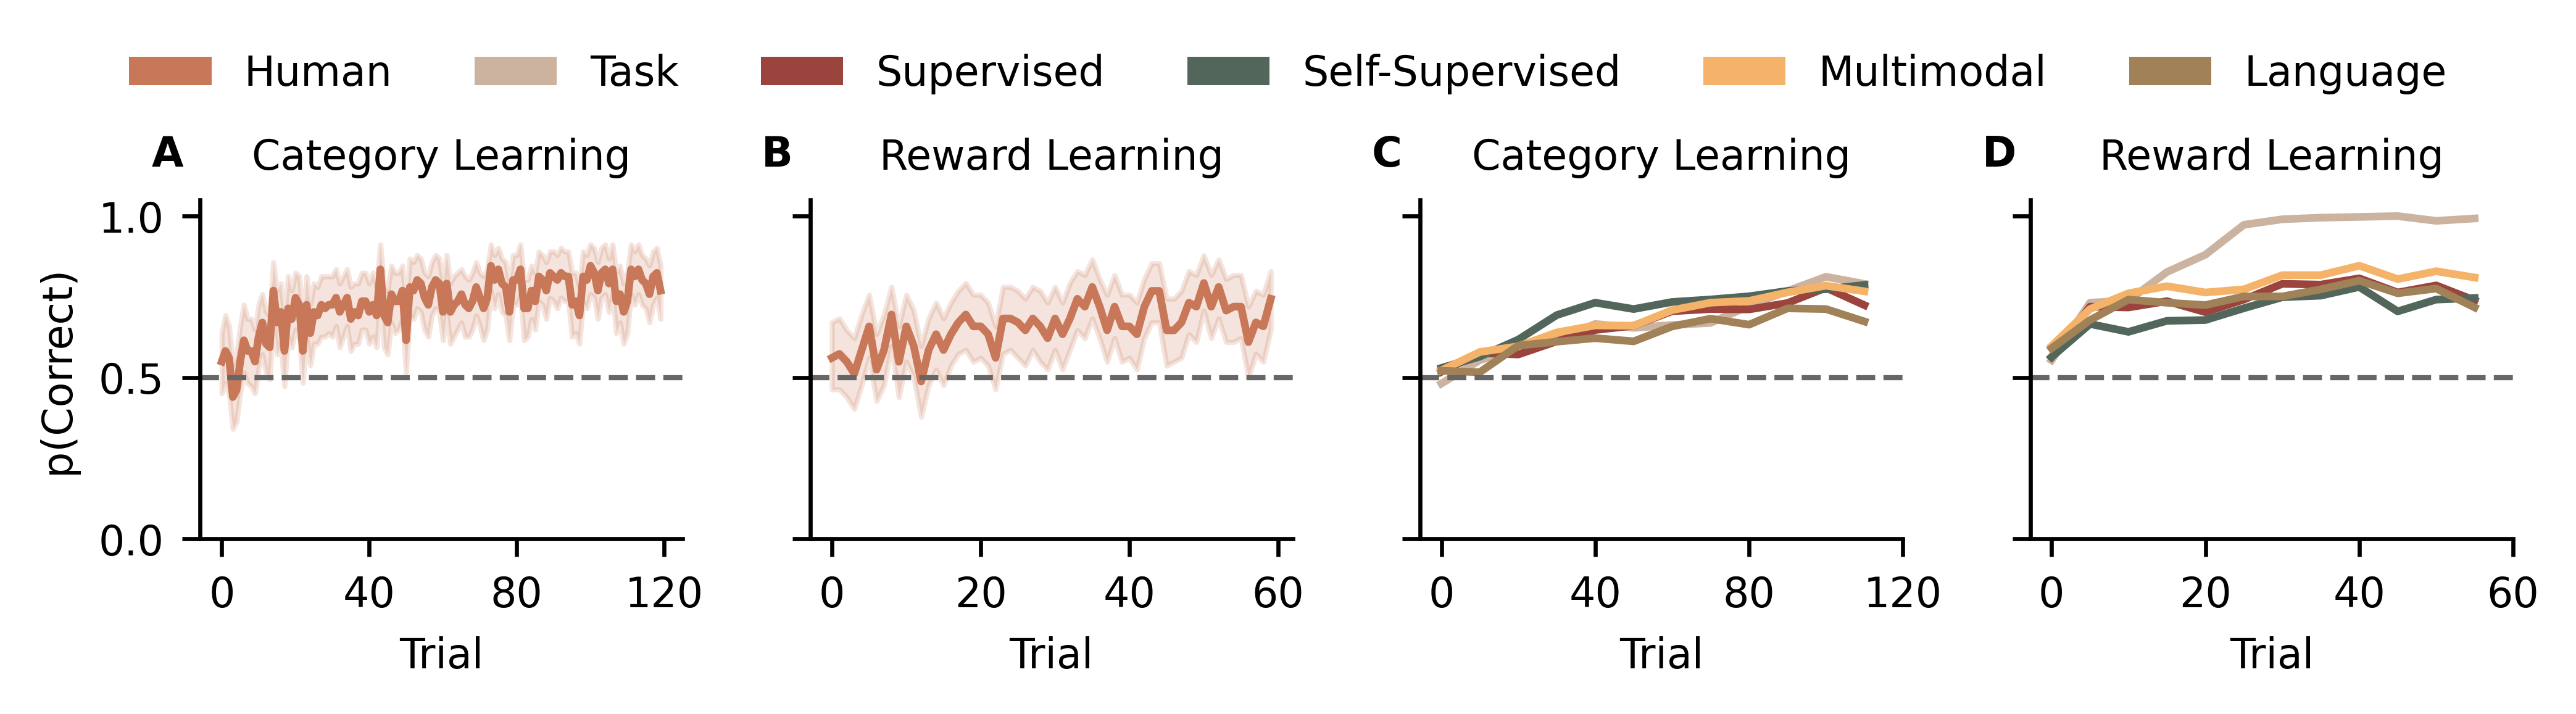

findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not

In [109]:
fig, axs = plt.subplots(1,4,figsize=(FIGWIDTH,FIGWIDTH/4),sharey=True)
behavioural_df = pd.read_csv(
    join(
        project_root,
        "data",
        "human_behavioural",
        "category_learning",
        "above_chance.csv",
    )
)
sns.lineplot(data=behavioural_df, x="trial", y="correct", ax=axs[0], color=cmap[-2])
axs[0].set_xlabel("Trial")
axs[0].set_ylabel("p(Correct)")
axs[0].axhline(0.5, ls="--", color=cmap[-1], lw=1)
axs[0].set_xticks([0, 40, 80, 120])
axs[0].text(-0.1, 1.1, string.ascii_uppercase[0], transform=axs[0].transAxes, weight="bold")  

behavioural_df = pd.read_csv(                                                                    
    join(                                                                                        
        project_root,                                                                            
        "data",                                                                                  
        "human_behavioural",                                                                     
        "reward_learning",                                                                     
        "above_chance.csv",                                                                      
    )                                                                                            
)                                                                                                
sns.lineplot(data=behavioural_df, x="trial", y="correct", ax=axs[1], color=cmap[-2])             
axs[1].set_xlabel("Trial")                                                                       
axs[1].set_ylabel("p(Best)")                                                                  
axs[1].axhline(0.5, ls="--", color=cmap[-1], lw=1)                                               
axs[1].set_xticks([0, 20, 40, 60])                                                              
axs[1].text(-0.1, 1.1, string.ascii_uppercase[1], transform=axs[1].transAxes, weight="bold")                       
             

best_models = [
    join(
        project_root,
        "data",
        "learner_behavioural",
        "category_learning",
        "clip_ViT-L_14_l2_original.csv",
    ),
    join(
        project_root,
        "data",
        "learner_behavioural",
        "category_learning",
        "vit_h_14_l2_original.csv",
    ),
    join(
        project_root,
        "data",
        "learner_behavioural",
        "category_learning",
        "task_l2_original.csv",
    ),
    join(
        project_root,
        "data",
        "learner_behavioural",
        "category_learning",
        "universal_sentence_encoder_l2_original.csv",
    ),
    join(
        project_root,
        "data",
        "learner_behavioural",
        "category_learning",
        "gLocal_dinov2-vit-large-p14_l2_original.csv",
    ),
]

best_models = [pd.read_csv(x) for x in best_models]
best_models = pd.concat(best_models)
cat_models = best_models
best_models['model_choice'] = np.where(best_models.right_value > best_models.left_value,1,0)
best_models["model_correct"] = best_models.true_category_binary == best_models.model_choice
best_models["colour"] = best_models["features"].apply(
    lambda x: plot_params[x]["colour"]
)
best_models["features"] = best_models["features"].apply(
    lambda x: plot_params[x]["name"]
)
best_models = best_models.reset_index(drop=True)

# average correct every 5 trials
best_models["model_correct"] = best_models.groupby(best_models.index // 10)[
    "model_correct"
].transform("mean")
# take every 5th trial
best_models = best_models.iloc[::10, :]


sns.lineplot(
    data=best_models,
    x="trial",
    y="model_correct",
    hue="colour",
    ax=axs[-2],
    palette=cmap[:-2],
    errorbar=None,
    legend=False,
    hue_order=[
        "task",
        "supervised",
        "self-supervised",
        "multimodal",
        "text",
    ],
)

axs[2].set_xlabel("Trial")
axs[2].set_ylabel("p(Correct)")
axs[2].axhline(0.5, ls="--", color=cmap[-1], lw=1)
axs[2].set_xticks([0, 40, 80, 120])
axs[2].text(-0.1, 1.1, string.ascii_uppercase[2], transform=axs[2].transAxes, weight="bold")                 



best_models = [
    join(
        project_root,
        "data",
        "learner_behavioural",
        "reward_learning",
        "clip_ViT-L_14_l2_original.csv",
    ),
    join(
        project_root,
        "data",
        "learner_behavioural",
        "reward_learning",
        "vit_h_14_l2_original.csv",
    ),
    join(
        project_root,
        "data",
        "learner_behavioural",
        "reward_learning",
        "task_l2_original.csv",
    ),
    join(
        project_root,
        "data",
        "learner_behavioural",
        "reward_learning",
        "roberta_l2_original.csv",
    ),
    join(
        project_root,
        "data",
        "learner_behavioural",
        "reward_learning",
        "dino-rn50_l2_original.csv",
    ),
]

best_models = [pd.read_csv(x) for x in best_models]
best_models = pd.concat(best_models)
best_models['model_choice'] = np.where(best_models.right_value > best_models.left_value,1,0)
best_models["true_category_binary"] = np.where(
    best_models.right_reward >= best_models.left_reward, 1, 0
)
best_models["model_correct"] = best_models.true_category_binary == best_models.model_choice

best_models["colour"] = best_models["features"].apply(
    lambda x: plot_params[x]["colour"]
)
best_models["features"] = best_models["features"].apply(
    lambda x: plot_params[x]["name"]
)
best_models = best_models.reset_index(drop=True)
# average correct every 5 trials after the first trial


best_models["model_correct"] = best_models.groupby(best_models.index // 5)[
    "model_correct"
].transform("mean")
# take every 5th trial
best_models = best_models.iloc[::5, :]

sns.lineplot(
    data=best_models,
    x="trial",
    y="model_correct",
    hue="colour",
    ax=axs[-1],
    palette=cmap[:-2],
    errorbar=None,
    legend=False,
    hue_order=[
        "task",
        "supervised",
        "self-supervised",
        "multimodal",
        "text",
    ],
)

axs[-1].set_xlabel("Trial")
axs[-1].set_ylabel("p(Best)")
axs[-1].axhline(0.5, ls="--", color=cmap[-1], lw=1)
axs[-1].set_xticks([0, 20, 40, 60])
axs[3].text(-0.1, 1.1, string.ascii_uppercase[3], transform=axs[3].transAxes, weight="bold")                 

axs[0].set_title("Category Learning")
axs[1].set_title("Reward Learning")
axs[2].set_title("Category Learning")
axs[3].set_title("Reward Learning")

custom_legend_lines = [
    mpatches.Patch(
        facecolor=x,
        edgecolor=None,
        lw=2,
    )
    for x in [cmap[-2],cmap[0],cmap[1],cmap[2],cmap[3],cmap[4]]
]
axs[0].set_ylim([0.,1.])

hue_order = [
    "Human",
    "Task",
    "Supervised",
    "Self-Supervised",
    "Multimodal",
    "Language",
]
fig.legend(
    custom_legend_lines,
    hue_order,
    loc="center",
    bbox_to_anchor=(0.5, 1.),
    ncol=6,
    frameon=False,
)

for ax in axs:
    ax.set_ylim([0,1.05])

plt.tight_layout()
plt.show()

with mpl.rc_context(latex_context):
    fig.savefig(join(project_root, "figures","neurips_learning_curves.pdf"), bbox_inches='tight')
    fig.savefig(join(project_root, "figures","neurips_learning_curves.svg"), bbox_inches='tight')

### Category Learning

/tmp/ipykernel_2754788/2673023634.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df.loc[model_df.nll==1]["nll"] = 0
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found

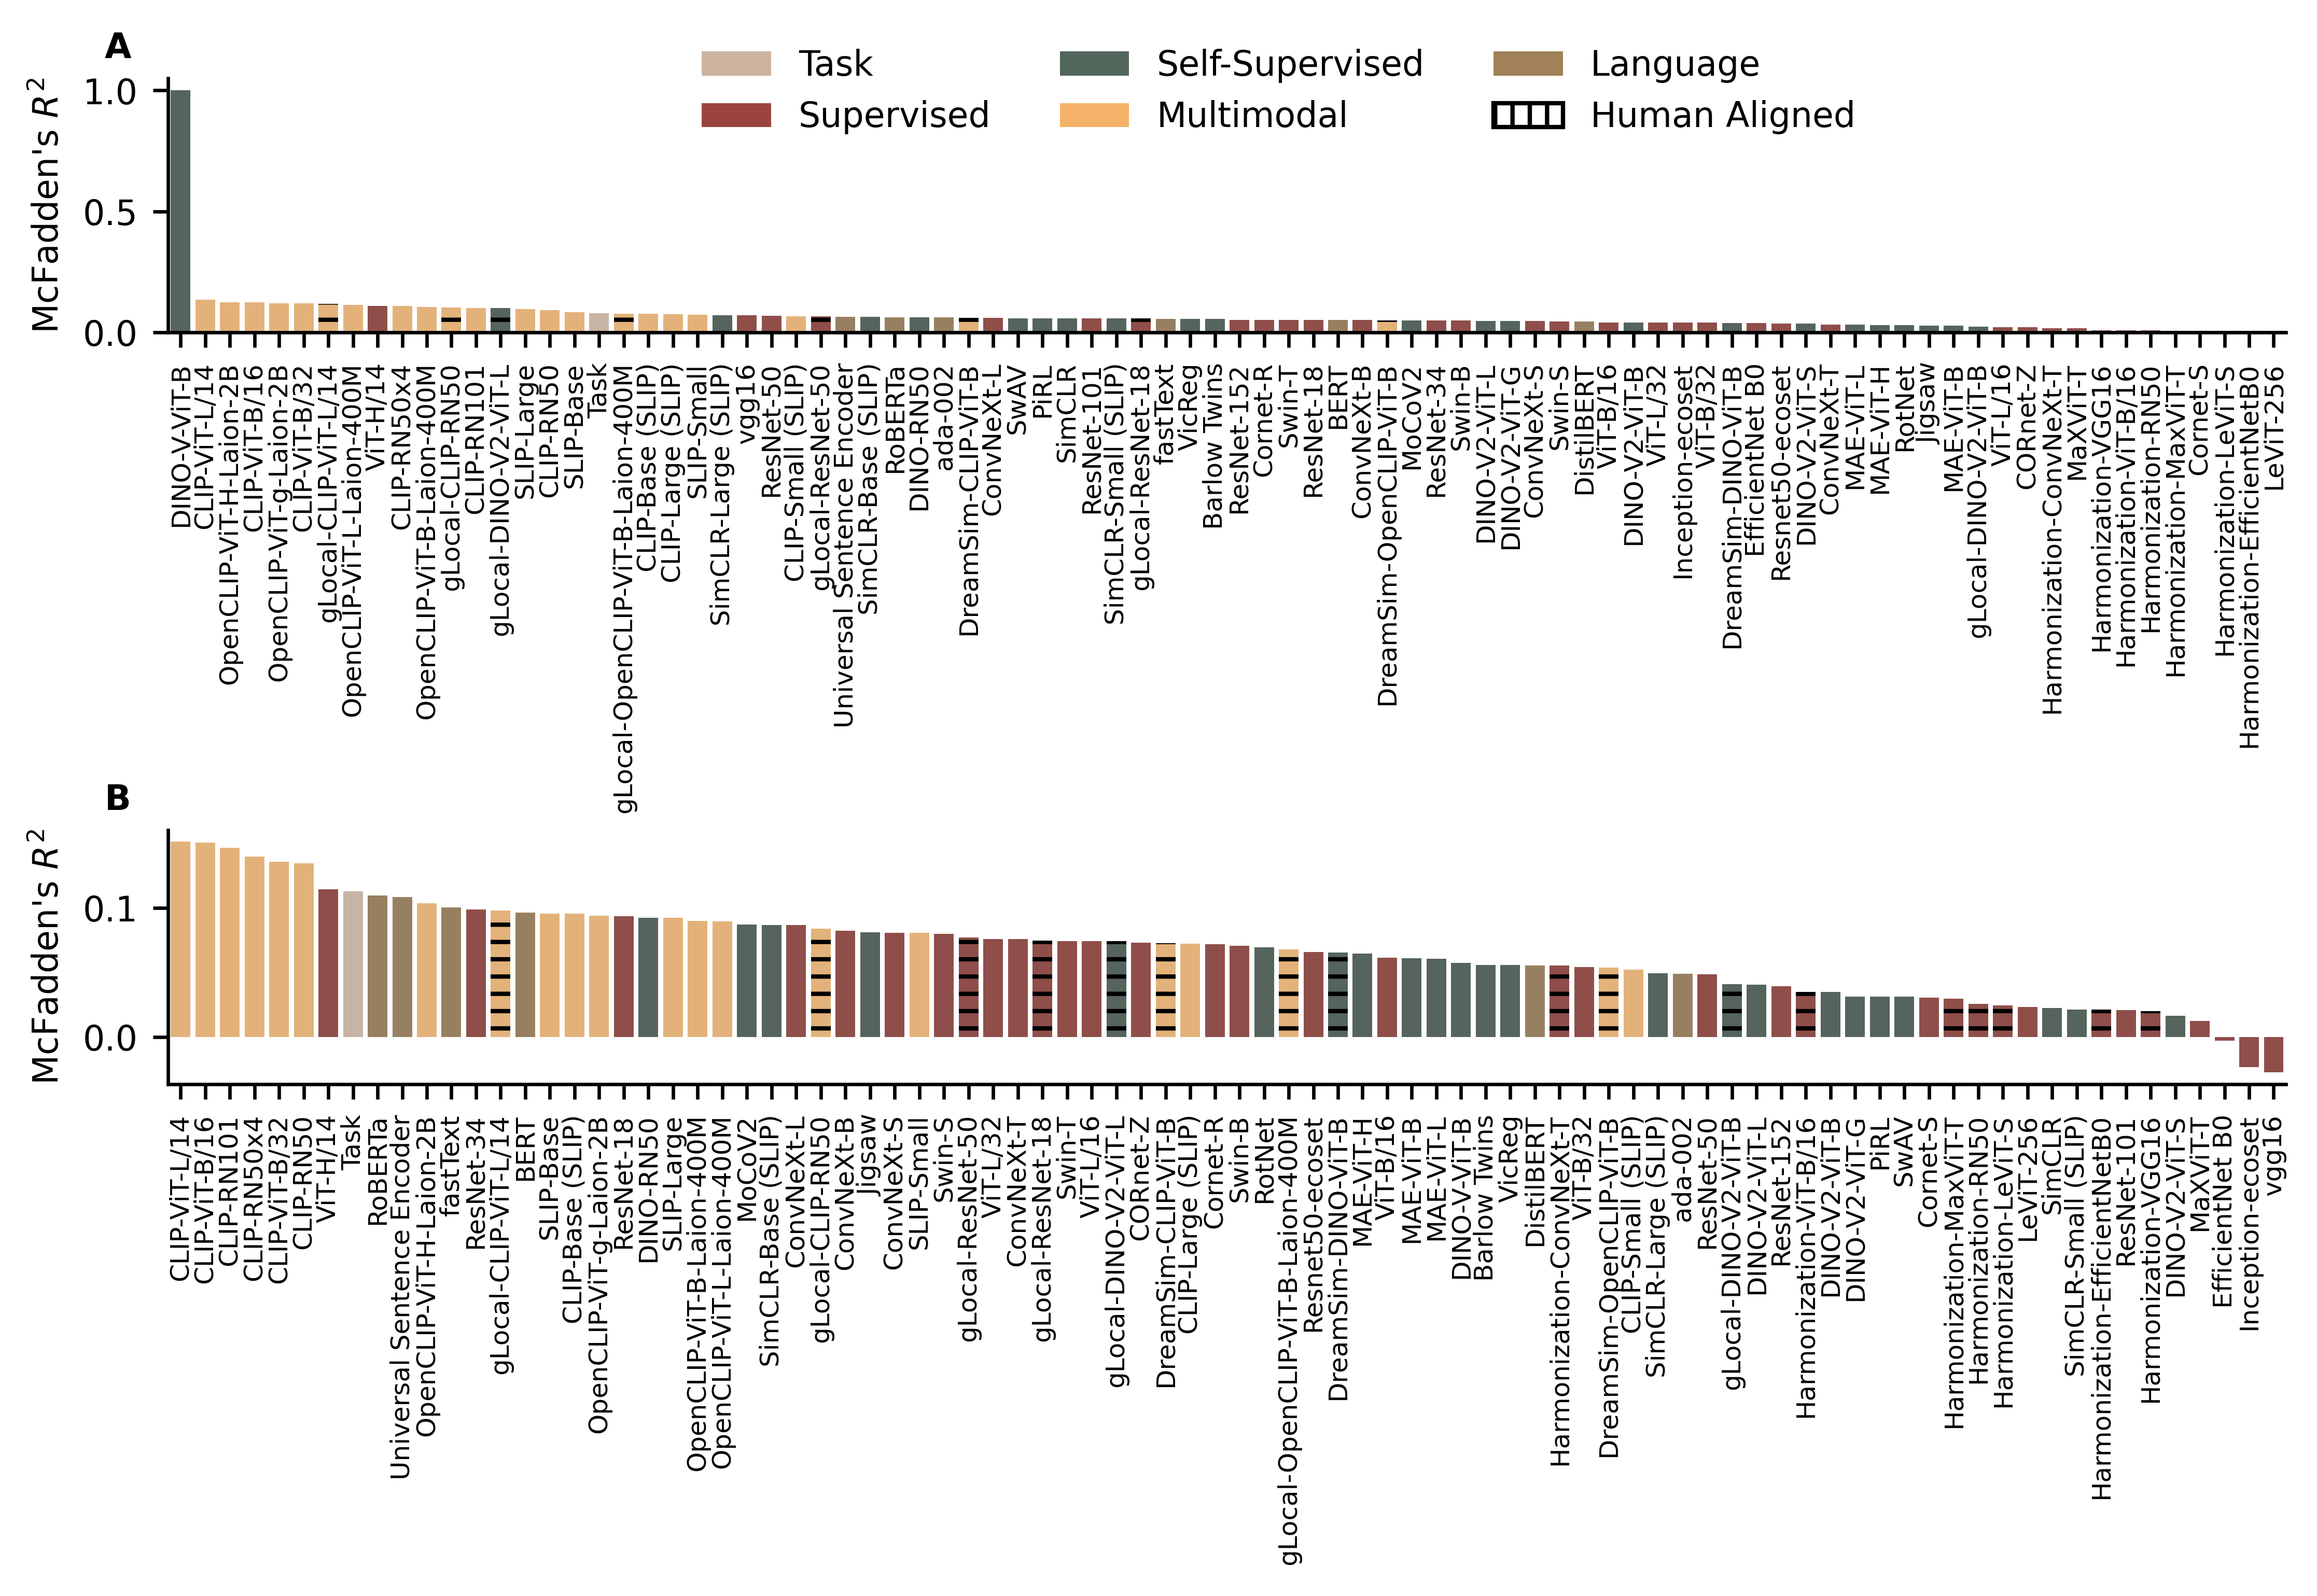

findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not

In [161]:
fig,axs = plt.subplots(2,1,figsize=(FIGWIDTH, FIGWIDTH/1.5))
plt.rcParams.update({'hatch.color': "k"})

dfs = glob.glob(
    join(
        project_root,
        "data",
        "learner_behavioural",
        "category_learning",
        "*_l2_original.csv",
    )
)
dfs = [pd.read_csv(x) for x in dfs]
model_df = pd.concat(dfs)
model_df["nll"] = -np.where(
    model_df.choice == 1, np.log(model_df.prob),np.log(1 - model_df.prob)
)
# model_df["right_value"] = np.where(model_df.right_value == 1, 0.99999, model_df.right_value)
# model_df["right_value"] = np.where(model_df.right_value == 0, 0.000001, model_df.right_value)
#model_df["nll"] = - np.log(model_df.right_value)
model_df = model_df[model_df.features.isin(main_feature_names)]
model_df["return"] = np.where(np.round(model_df.prob) == model_df.true_category_binary, 1, 0)
#model_df["return"] = np.where(np.round(model_df.right_value) == model_df.true_category_binary, 1, 0)
chance_level = -model_df.participant.nunique() * CATEGORYTRIALS * np.log(0.5)
model_df = model_df.groupby("features").agg({"nll": "sum", "return": "mean"}).reset_index()
model_df = model_df.sort_values(by="nll", ascending=True).reset_index(drop=True)
model_df["color"] = model_df["features"].apply(lambda x: plot_params[x]["colour"])
model_df["feature_key"] = model_df["features"]
model_df["alignment"] = model_df["features"].apply(lambda x: plot_params[x]["alignment"])
model_df["features"] = model_df["features"].apply(lambda x: plot_params[x]["name"])
model_df["nll"] = 1 - model_df.nll/chance_level
model_df.loc[model_df.nll==1]["nll"] = 0
category_model_df = model_df
num_hue_levels = model_df['color'].nunique()

# Repeat the hatches list for each hue level
sns.barplot(
    data=model_df,
    x="features",
    y="nll",
    hue="color",
    dodge=False,
    ax=axs[0],
    hue_order=[
        "task",
        "supervised",
        "self-supervised",
        "multimodal",
        "text",
    ],
)
hatches = ["---" if x=="True" else "" for x in model_df.alignment.values] * num_hue_levels
bar_patches = [patch for patch in axs[0].patches 
               if isinstance(patch, plt.Rectangle) and patch.get_height() > 0]

# Sort the patches by their x-coordinate to ensure left-to-right order
bar_patches_sorted = sorted(bar_patches, key=lambda patch: patch.get_x())
for hatch, patch in zip(hatches, bar_patches_sorted):
    patch.set_hatch(hatch)
axs[0].legend_.remove()
axs[0].tick_params(axis="x", which="major", labelsize=SMALLER_SIZE)
#axs[0].axhline(chance_level, ls="--", color=cmap[-1])
# show x-axis ticks in the bars
axs[0].xaxis.set_tick_params(rotation=90)
axs[0].set_ylabel("Accuracy")
#axs[0].set_ylabel(r"McFadden's $R^2$")
axs[0].set_xlabel("")
#axs[0].set_ylim(5000, 8000)
#axs[0].set_yticks([5000, 6000, 7000, 8000])
axs[0].text(-0.03, 1.08, string.ascii_uppercase[0], transform=axs[0].transAxes, weight="bold")

# custom_legend_lines = [
#     Line2D(
#         [0],
#         [0],
#         color=x,
#         lw=2,
#         path_effects=[pe.Stroke(linewidth=4, foreground=cmap[-1]), pe.Normal()],
#     )
#     for x in cmap[:5]
# ]

custom_legend_lines = [
    mpatches.Patch(
        facecolor=x,
        edgecolor=None,
        lw=2,
    )
    for x in cmap[:5]
]


human_aligned_bar = mpatches.Patch(facecolor='none', edgecolor="k", hatch='|||', label='Human Aligned')



dfs = glob.glob(
    join(
        project_root,
        "data",
        "learner_behavioural",
        "reward_learning",
        "*_l2_original.csv",
    )
)
dfs = [pd.read_csv(x) for x in dfs]
model_df = pd.concat(dfs)
model_df = model_df[model_df.features.isin(main_feature_names)]
model_df["prob"] = np.where(model_df.prob == 1, 0.99999, model_df.prob)
model_df["nll"] = -np.where(
    model_df.choice == 1, np.log(model_df.prob), np.log(1 - model_df.prob)
)
chance_level = -model_df.participant.nunique() * REWARDTRIALS * np.log(0.5)
model_df["model_choice"] = np.where(model_df.right_value > model_df.left_value, 1,0)
model_df["best_side"] = np.where(model_df.right_reward > model_df.left_reward, 1, 0)
model_df["return"] = np.where(model_df.model_choice == model_df.best_side,1,0)
model_df = model_df.groupby("features").agg({"nll": "sum", "return": "mean"}).reset_index()
model_df = model_df.sort_values(by="nll", ascending=True).reset_index(drop=True)
model_df["color"] = model_df["features"].apply(lambda x: plot_params[x]["colour"])
model_df["alignment"] = model_df["features"].apply(lambda x: plot_params[x]["alignment"])
model_df["feature_key"] = model_df["features"]
model_df["features"] = model_df["features"].apply(lambda x: plot_params[x]["name"])
model_df["nll"] = 1 - model_df.nll/chance_level
reward_model_df = model_df

num_hue_levels = model_df['color'].nunique()

# Repeat the hatches list for each hue level

sns.barplot(
    data=model_df,
    x="features",
    y="nll",
    hue="color",
    dodge=False,
    ax=axs[1],
    hue_order=[
        "task",
        "supervised",
        "self-supervised",
        "multimodal",
        "text",
    ],
)
hatches = ["---" if x=="True" else "" for x in model_df.alignment.values] * num_hue_levels
bar_patches = [patch for patch in axs[1].patches 
               if isinstance(patch, plt.Rectangle) and patch.get_height() > 0]

# Sort the patches by their x-coordinate to ensure left-to-right order
bar_patches_sorted = sorted(bar_patches, key=lambda patch: patch.get_x())
for hatch, patch in zip(hatches, bar_patches_sorted):
    patch.set_hatch(hatch)
axs[1].legend_.remove()
# axs[1].axhline(.5, ls="--", color=cmap[-1])
# axs[0].axhline(.5, ls="--", color=cmap[-1])

# show x-axis ticks in the bars
axs[1].xaxis.set_tick_params(rotation=90)
axs[0].set_ylabel(r"McFadden's $R^2$")
axs[1].set_ylabel(r"McFadden's $R^2$")
axs[1].set_xlabel("")
#axs[1].set_ylim(2500, 3500)
#axs[1].set_yticks([2500, 3000, 3500])
#axs[1].yaxis.set_label_coords(-0.07, 0.4)
axs[1].tick_params(axis="x", which="major", labelsize=SMALLER_SIZE)
axs[1].tick_params(axis="x", which="major", labelsize=SMALLER_SIZE)


axs[1].text(-0.03, 1.08, string.ascii_uppercase[1], transform=axs[1].transAxes, weight="bold")
def two_decimals(x, pos):
    return f'{x:.2f}'

# Apply the formatter to the y-axis
axs[1].yaxis.set_major_formatter(FuncFormatter(two_decimals))


# Append the new bar and label to the existing lists
custom_legend_lines.append(human_aligned_bar)
hue_order = [
    "Task",
    "Supervised",
    "Self-Supervised",
    "Multimodal",
    "Language",
]
hue_order.append("Human Aligned")
fig.legend(
    custom_legend_lines,
    hue_order,
    loc="center",
    bbox_to_anchor=(0.56, .98),
    ncol=3,
    frameon=False,
)
plt.tight_layout(pad=-1.5)

# axs[0].set_ylim(.4, .7)
# axs[1].set_ylim(.4, .7)

axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))


plt.show()

with mpl.rc_context(latex_context):
    fig.savefig(join(project_root, "figures","neurips_nll.pdf"), bbox_inches='tight')

In [162]:
dfs = glob.glob(
    join(
        project_root,
        "data",
        "learner_behavioural",
        "category_learning",
        "*_l2_original.csv",
    )
)
dfs = [pd.read_csv(x) for x in dfs]
model_df = pd.concat(dfs)

### Reward Learning

### RSA

/tmp/ipykernel_2754788/1261792695.py:38: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_2754788/1261792695.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ax0_df["model_size"] = pd.to_numeric(ax0_df["model_size"], errors='coerce')
/tmp/ipykernel_2754788/1261792695.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ax0_df.model_size = ax0_df.model_size * 1e6
/tmp/ipykernel_2754788/1261792695.py:105: SettingWithCopyWarning

1.9141708419081235e-18
6.816354627315022e-06
1.0323445625751914e-06


/tmp/ipykernel_2754788/1261792695.py:175: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_2754788/1261792695.py:218: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.scatterplot(


1.0979955723615355e-05
nan


/tmp/ipykernel_2754788/1261792695.py:266: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findf

standard scale ID nan


findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not

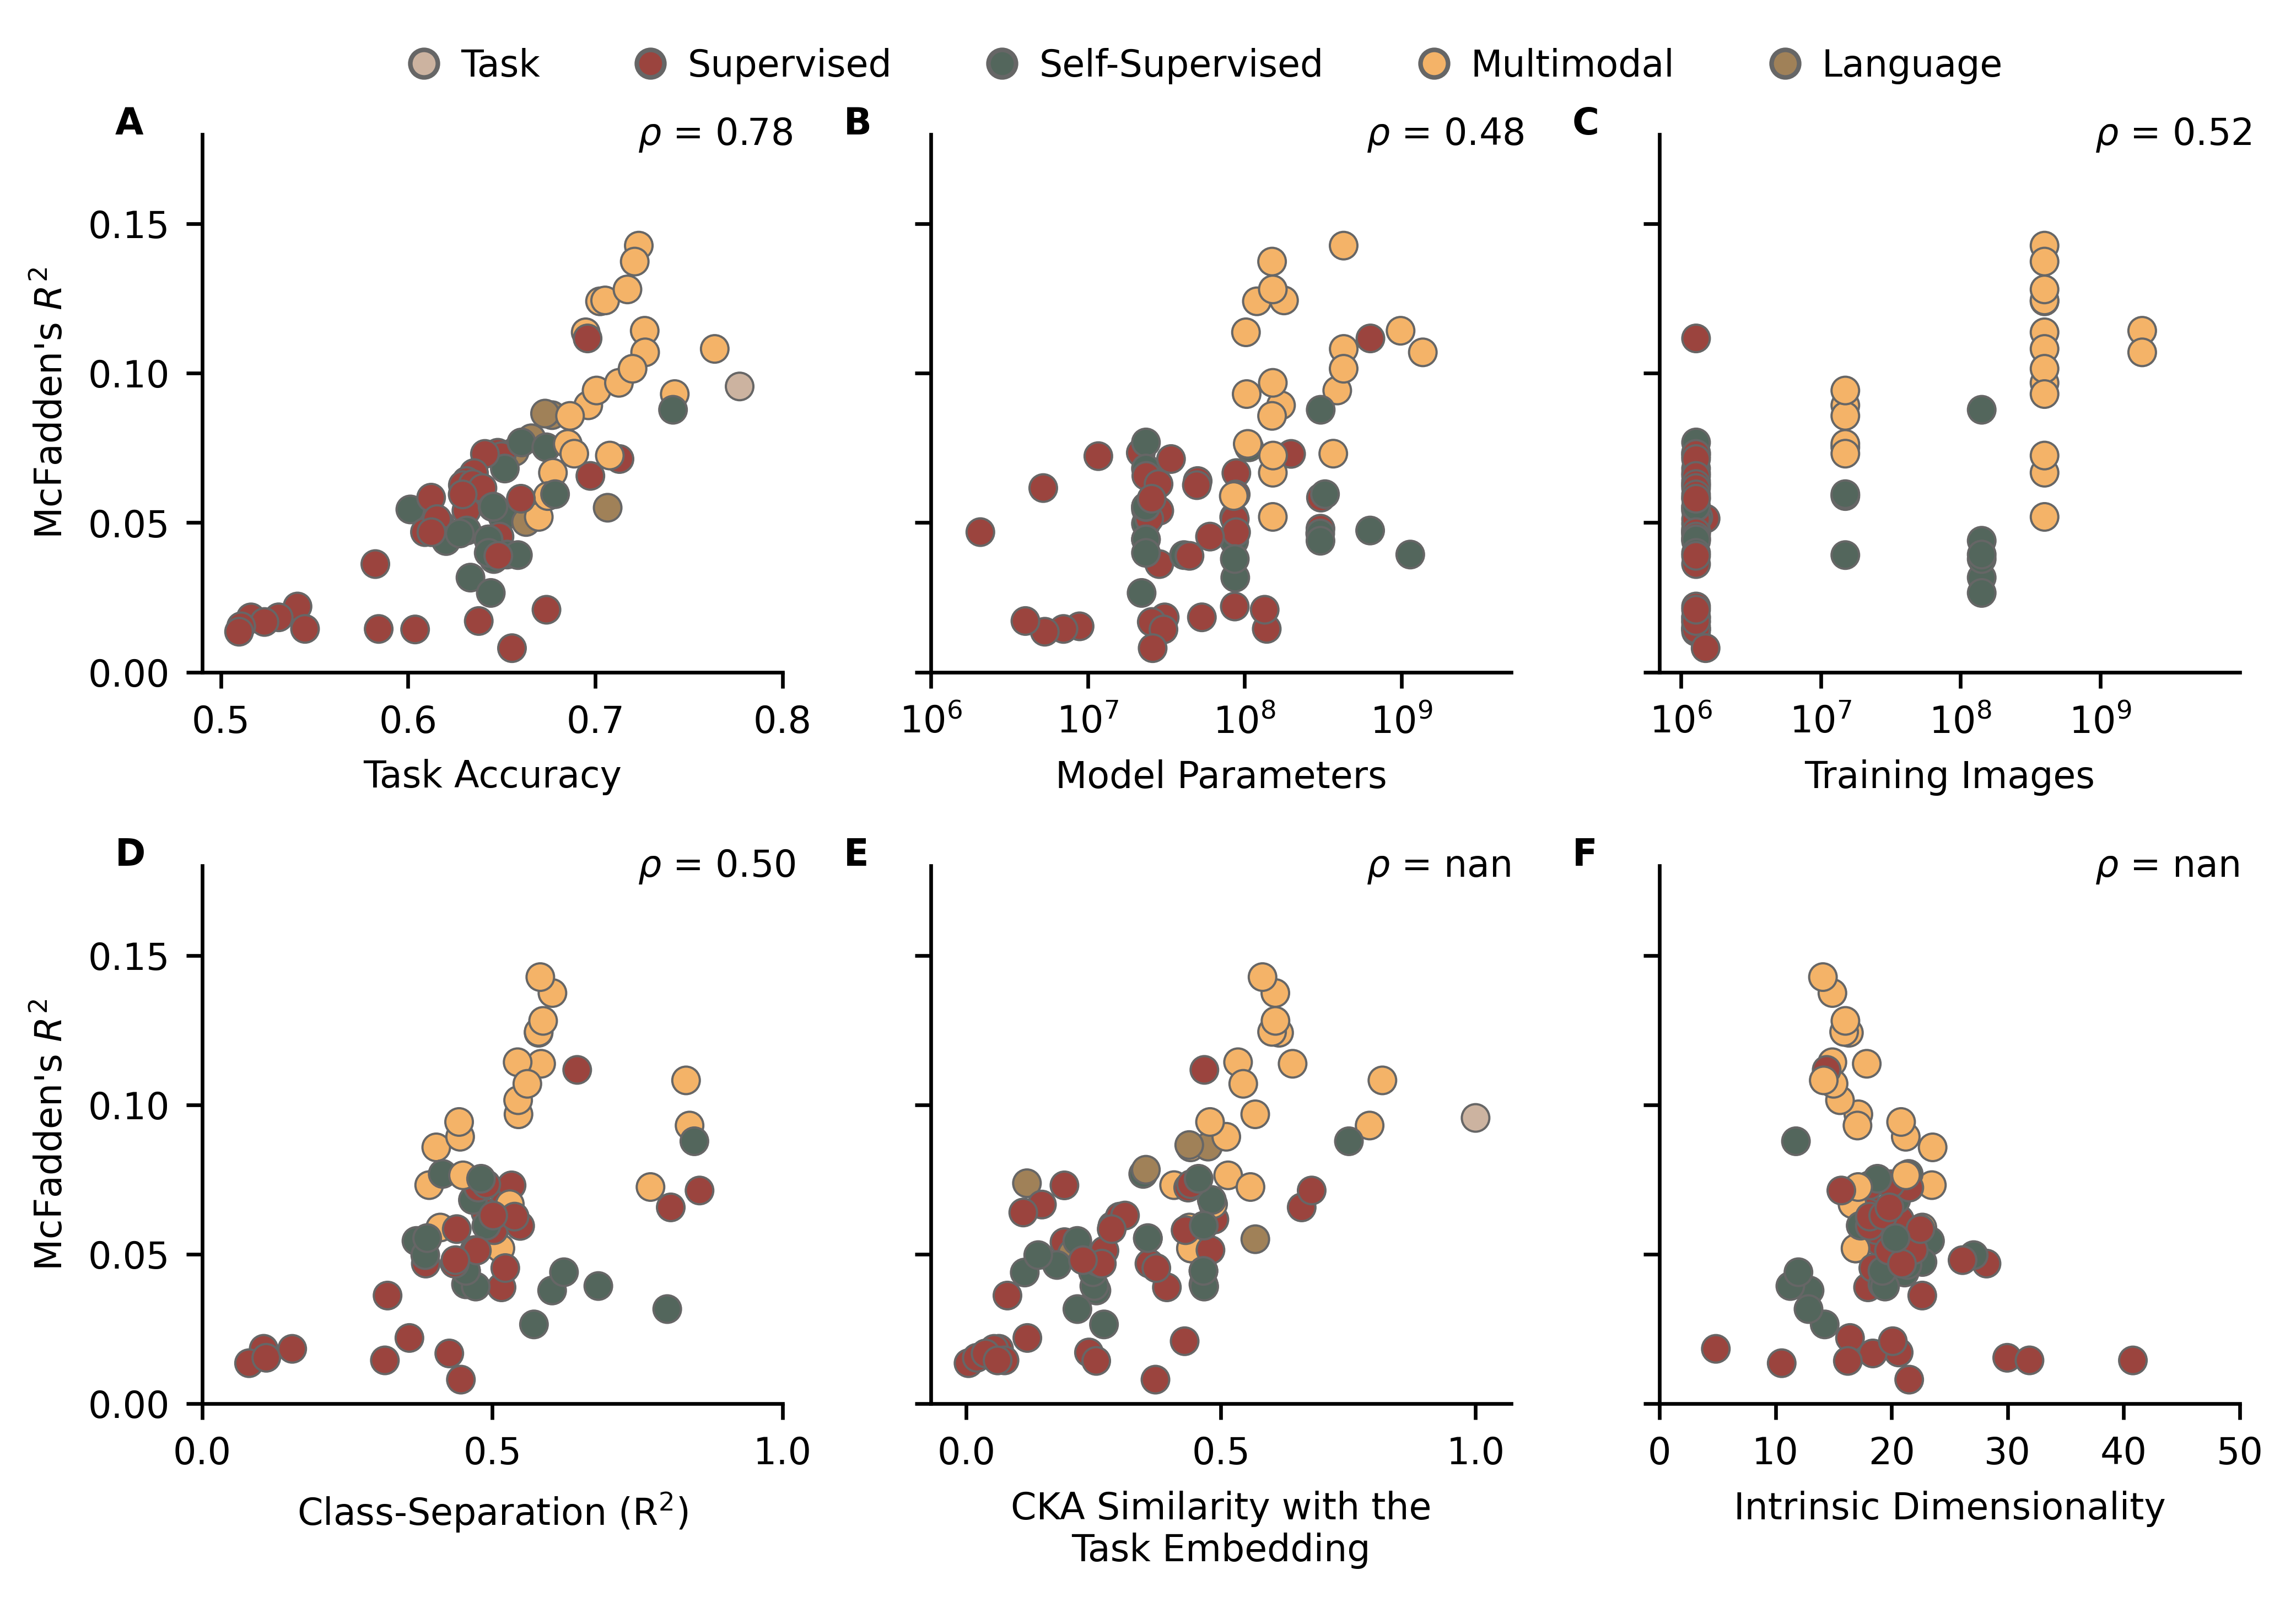

In [106]:
fig, axs = plt.subplots(2,3, figsize=(FIGWIDTH, 2*FIGWIDTH/3),sharey=True)
axs[1,0].set_ylabel("Negative Log Likelihood")

merged_df = pd.merge(
    reward_model_df[["features", "color", "nll", "return","feature_key"]],
    category_model_df[["features", "color", "nll", "return","feature_key"]],
    on=["features", "color", "feature_key"],
    suffixes=("_reward", "_category"),
)

peterson_data = json.load(open(join(project_root,"data","peterson_correlations.json")))
nights_data = json.load(open(join(project_root,"data","nights.json")))

merged_df["nll"] = (merged_df["nll_reward"] + merged_df["nll_category"])/2
merged_df["return"] = (merged_df["return_reward"] + merged_df["return_category"])/2
merged_df.drop(["return_reward", "return_category"], axis=1, inplace=True)
merged_df.drop(["nll_reward", "nll_category"], axis=1, inplace=True)
merged_df["model_size"] = model_df["feature_key"].apply(
    lambda x: plot_params[x]["size"]
)
merged_df["zero_shot"] = model_df["feature_key"].apply(
    lambda x: plot_params[x]["zero-shot"]
)
merged_df["probing"] = model_df["feature_key"].apply(
    lambda x: plot_params[x]["probing"]
)
merged_df["peterson"] = model_df["feature_key"].apply(
    lambda x: peterson_data.get(x, np.nan)
)
merged_df["nights"] = model_df["feature_key"].apply(
    lambda x: nights_data.get(x, np.nan)
)
merged_df["training_data"] = model_df["feature_key"].apply(
    lambda x: plot_params[x]["data-size"]
)


sns.scatterplot(
    data=merged_df,
    x="return",
    y="nll",
    ax=axs[0,0],
    hue="color",
    edgecolor=cmap[-1],
    hue_order=[
        "task",
        "supervised",
        "self-supervised",
        "multimodal",
        "text",
    ],
    palette=cmap[:-1],
    legend=False,
)
axs[0,0].set_xlabel("Task Accuracy")
axs[0,0].set_ylabel("")
tau, p_value = spearmanr(merged_df["return"], merged_df["nll"])
print(p_value)
axs[0,0].text(0.75, 0.98, r"$\rho$ = {:.2f}".format(tau), transform=axs[0,0].transAxes)

axs[0,0].set_ylabel("Negative Log Likelihood")


ax0_df = merged_df[
    merged_df["color"].isin(
        ["supervised", "self-supervised", "multimodal"]
    )
]
ax0_df["model_size"] = pd.to_numeric(ax0_df["model_size"], errors='coerce')


ax0_df.model_size = ax0_df.model_size * 1e6


sns.scatterplot(
    data=ax0_df,
    x="model_size",
    y="nll",
    ax=axs[0,1],
    hue="color",
    hue_order=["supervised", "self-supervised", "multimodal"],
    legend=False,
    palette=cmap[1:4],
    edgecolor=cmap[-1],
)
axs[0,1].set_xlabel("Model Parameters")
axs[0,1].set_ylabel("")
axs[0,1].set_xscale("log")
axs[0,1].minorticks_off()
axs[0,1].set_xticks([1e6, 1e7, 1e8, 1e9])
axs[0,1].set_yticks([])


# print the kendall tau correlation on the upper right corner of the plot
tau, p_value = spearmanr(ax0_df["model_size"], ax0_df["nll"])
axs[0,1].text(0.75, 0.98, r"$\rho$ = {:.2f}".format(tau), transform=axs[0,1].transAxes)
print(p_value)


ax1_df = merged_df[
    merged_df["color"].isin(
        ["supervised", "self-supervised", "multimodal"]
    )
]
ax1_df["training_data"] = pd.to_numeric(ax1_df["training_data"], errors='coerce')



sns.scatterplot(
    data=ax1_df,
    x="training_data",
    y="nll",
    ax=axs[0,2],
    hue="color",
    hue_order=["supervised", "self-supervised", "multimodal"],
    legend=False,
    palette=cmap[1:4],
    edgecolor=cmap[-1],
)
axs[0,2].set_xlabel("Training Images")
axs[0,2].set_ylabel("")

# print the kendall tau correlation on the upper right corner of the plot
tau, p_value = spearmanr(ax1_df["training_data"], ax1_df["nll"])
axs[0,2].text(0.75,0.98, r"$\rho$ = {:.2f}".format(tau), transform=axs[0,2].transAxes)
axs[0,2].set_yticks([])
# make ax1 log
axs[0,2].set_xscale("log")
# make ax1 x ticks 10^7, 10^8, 10^9
axs[0,2].set_xticks([1e6, 1e7, 1e8, 1e9])
axs[0,2].minorticks_off()

print(p_value)

r2_dfs = glob.glob(join(project_root, "data", "r2", "*.csv"))


dfs = []
for file_path in r2_dfs:
    file_name = os.path.basename(file_path).split(".")[0]
    df = pd.read_csv(file_path)
    df["features"] = file_name
    dfs.append(df)

r2_df = pd.concat(dfs, ignore_index=True)
r2_df = r2_df[r2_df.r2 <= 0.99].reset_index(drop=True)
r2_df = r2_df[r2_df.features.isin(main_feature_names)]

# merged_df = pd.merge(
#     reward_model_df[["features", "color", "nll"]],
#     category_model_df[["features", "color", "nll"]],
#     on=["features", "color"],
#     suffixes=("_reward", "_category"),
# )

# merged_df["nll"] = merged_df["nll_reward"] + merged_df["nll_category"]
# merged_df.drop(["nll_reward", "nll_category"], axis=1, inplace=True)

r2_df["color"] = r2_df["features"].apply(lambda x: plot_params[x]["colour"])
r2_df["features"] = r2_df["features"].apply(lambda x: plot_params[x]["name"])

r2_df = pd.merge(r2_df, merged_df, on=["features", "color"], how="outer")

# drop those that have color text or task
r2_df = r2_df[~r2_df.color.str.startswith("text")].reset_index(drop=True)
r2_df = r2_df[~r2_df.color.str.startswith("task")].reset_index(drop=True)


# remove those that have NaNs
r2_df = r2_df[~r2_df.isna().any(axis=1)].reset_index(drop=True)

# plot a scatterplot, with r2 in the x-axis, and nll on the y-axis.
# color the points by the column color

sns.scatterplot(
    data=r2_df,
    x="r2",
    y="nll",
    hue="color",
    ax=axs[1,0],
    edgecolor=cmap[-1],
    hue_order=[
        "supervised",
        "self-supervised",
        "multimodal",
    ],
    palette=cmap[1:-1],
    legend=False,
)

axs[1,0].set_xlabel("Class-Separation (R$^2$)")
# remove y-axis ticks
axs[1,0].set_xticks([0, 0.25, 0.5, 0.75])

# print the kendall tau correlation on the upper right corner of the plot
tau, p_value = spearmanr(r2_df["r2"], r2_df["nll"])
axs[1,0].text(0.75, 0.98, r"$\rho$ = {:.2f}".format(tau), transform=axs[1,0].transAxes)
print(p_value)

task_cka_df = pd.read_csv(join(project_root, "data", "cka", "target_task.csv"))
task_cka_df = task_cka_df[task_cka_df.feature.isin(main_feature_names)]
task_cka_df = task_cka_df[task_cka_df.feature != "cornet-rt"].reset_index(drop=True)
task_cka_df = task_cka_df[task_cka_df.feature != "task"].reset_index(drop=True)
task_cka_df["color"] = task_cka_df["feature"].apply(lambda x: plot_params[x]["colour"])

task_cka_df["features"] = task_cka_df["feature"].apply(lambda x: plot_params[x]["name"])
# add nll column from the merged_df
task_cka_df = pd.merge(
    task_cka_df,
    merged_df[["features", "color", "nll"]],
    on=["features", "color"],
    how="outer",
)

# where color is task, make cka 1,
task_cka_df["cka"] = np.where(task_cka_df["color"] == "task", 1, task_cka_df["cka"])

sns.scatterplot(
    data=task_cka_df,
    x="cka",
    y="nll",
    hue="color",
    ax=axs[1,1],
    edgecolor=cmap[-1],
    hue_order=[
        "task",
        "supervised",
        "self-supervised",
        "multimodal",
        "text",
    ],
    palette=cmap[:-1],
    legend=False,
)

axs[1,1].set_xlabel("CKA Similarity with the\nTask Embedding")
axs[1,1].set_ylabel("")
# re4e y-axis ticks
axs[1,1].set_yticks([])
# pr4 the kendall tau correlation on the upper right corner of the plot
tau, p_value = spearmanr(task_cka_df["cka"], task_cka_df["nll"])
axs[1,1].text(0.75, 0.98, r"$\rho$ = {:.2f}".format(tau), transform=axs[1,1].transAxes)
print(p_value)

r2_dfs = glob.glob(join(project_root, "data", "ID", "*.csv"))


dfs = []
for file_path in r2_dfs:
    file_name = os.path.basename(file_path).split(".")[0]
    df = pd.read_csv(file_path)
    df["features"] = file_name
    dfs.append(df)

id_df = pd.concat(dfs, ignore_index=True)

id_df = id_df[id_df.features.isin(main_feature_names)]

id_df["color"] = id_df["features"].apply(lambda x: plot_params[x]["colour"])
id_df["features"] = id_df["features"].apply(lambda x: plot_params[x]["name"])

id_df = pd.merge(id_df, merged_df, on=["features", "color"], how="outer")
id_df=id_df[id_df.color.isin(["self-supervised","supervised","multimodal"])]


sns.scatterplot(
    data=id_df,
    x="local ID",
    y="nll",
    hue="color",
    ax=axs[1,2],
    edgecolor=cmap[-1],
    hue_order=[
        "supervised",
        "self-supervised",
        "multimodal",
    ],
    palette=cmap[1:-1],
    legend=False,
)

axs[1,2].set_xlabel("Intrinsic Dimensionality")
axs[1,2].set_ylabel("")
# re4e y-axis ticks
axs[1,2].set_yticks([])
# pr4 the kendall tau correlation on the upper right corner of the plot
tau, p_value = spearmanr(id_df["local ID"], id_df["nll"])
print(f"standard scale ID {p_value}")

axs[1,2].text(0.75, 0.98, r"$\rho$ = {:.2f}".format(tau), transform=axs[1,2].transAxes)
axs[1,2].set_xlim([0,50])

custom_legend_lines = [
    Line2D(
        [0],
        [0],
        color=x,
        marker="o",
        markeredgecolor=cmap[-1],
        linestyle="-",
        linewidth=0,
    )
    for x in cmap[0:-1]
]
hue_order = [
    "Task",
    "Supervised",
    "Self-Supervised",
    "Multimodal",
    "Language",
]
fig.legend(
    custom_legend_lines,
    hue_order,
    loc="center",
    bbox_to_anchor=(0.52, 1.0),
    ncol=5,
    frameon=False,
    handletextpad=0.01,
)

# ax00 = fig.add_subplot(spec[1, :])

# # sort the dataframe by cka
# task_cka_df = task_cka_df.sort_values(by="cka", ascending=False).reset_index(drop=True)
# # remove the task row
# task_cka_df = task_cka_df[task_cka_df.color != "task"].reset_index(drop=True)


# sns.barplot(
#     data=task_cka_df,
#     x="features",
#     y="cka",
#     hue="color",
#     ax=ax00,
#     dodge=False,
#     hue_order=[
#         "task",
#         "supervised",
#         "self-supervised",
#         "multimodal",
#         "text",
#     ],
# )

#ax00.set_ylabel("Similarity (CKA)\nwith Task Embedding")
#ax00.xaxis.set_tick_params(rotation=90)
#ax00.set_xlabel("")
# remove legend
#ax00.legend_.remove()

# set x-tick size to SMALLER_SIZE
#ax00.tick_params(axis="x", which="major", labelsize=SMALLER_SIZE)


for i,ax in enumerate(axs.flatten()):
    ax.text(-0.15, 1.0, string.ascii_uppercase[i], transform=ax.transAxes, weight="bold")


#axs[0,0].set_ylim([9200,11000])
#axs[0,0].set_yticks([9200, 10000, 10800])
#axs[1,0].set_ylim([9200,11000])
#axs[1,0].set_yticks([9200, 10000, 10800])

axs[0,0].set_xlim([.49,.8])
axs[0,0].set_xticks([.5, .6, .7, .8])

axs[0,1].set_xlim(1e6,5000000000)

axs[0,2].set_xlim([700000, 1e10])

axs[1,0].set_xlim([0,1])
axs[1,0].set_xticks([0, .5, 1.])

axs[1,1].set_xlim([-.07,1.07])
axs[1,1].set_xticks([0, .5, 1.])
axs[0,0].set_ylabel(r"McFadden's $R^2$")
axs[1,0].set_ylabel(r"McFadden's $R^2$")
axs[0,1].set_yticks([0, .05, .1, .15])
axs[1,1].set_yticks([0, .05, .1, .15])
axs[0,0].set_ylim([0, .18])


plt.tight_layout()

with mpl.rc_context(latex_context):
    fig.savefig(join(project_root, "figures","neurips_investigation.pdf"), bbox_inches='tight')

In [118]:
id_df[id_df['local ID'].isna()]

Empty DataFrame
Columns: [Feature, local ID, global ID, features, color, feature_key, nll, return, model_size, zero_shot, probing, peterson, nights, training_data]
Index: []

In [119]:
merged_df['r2'] = merged_df['features'].map(r2_df.set_index('features')['r2'])
merged_df['cka'] = merged_df['features'].map(task_cka_df.set_index('features')['cka'])
merged_df['id'] = merged_df['features'].map(id_df.set_index('features')['local ID'])

In [120]:
merged_df['zero_shot'] = pd.to_numeric(merged_df['zero_shot'].replace('NA', np.nan), errors='coerce')
merged_df['probing'] = pd.to_numeric(merged_df['probing'].replace('NA', np.nan), errors='coerce')


In [121]:
merged_df.color.unique()

array(['multimodal', 'supervised', 'task', 'text', 'self-supervised'],
      dtype=object)

In [122]:
merged_df

features            color           feature_key       nll  \
0      CLIP-ViT-L/14       multimodal         clip_ViT-L_14  0.142718   
1      CLIP-ViT-B/16       multimodal         clip_ViT-B_16  0.137379   
2         CLIP-RN101       multimodal            clip_RN101  0.124082   
3        CLIP-RN50x4       multimodal           clip_RN50x4  0.124377   
4      CLIP-ViT-B/32       multimodal         clip_ViT-B_32  0.128061   
..               ...              ...                   ...       ...   
80     DINO-V2-ViT-S  self-supervised  dinov2-vit-small-p14  0.026491   
81          MaXViT-T       supervised                maxvit  0.014275   
82   EfficientNet B0       supervised          efficientnet  0.017099   
83  Inception-ecoset       supervised      Inception_ecoset  0.008009   
84             vgg16       supervised                 vgg16  0.020869   

      return model_size  zero_shot  probing  peterson    nights training_data  \
0   0.723199     427.62      46.71    60.64  0.384368  0.798212     400000000   
1   0.721027     149.62      50.34    60.72  0.485542  0.817369     400000000   
2   0.702481     119.69      51.26    60.22  0.511140  0.845466     400000000   
3   0.705224      178.3      50.24    60.38  0.484924  0.832695     400000000   
4   0.717147     151.28      51.41    60.54  0.506460  0.822478     400000000   
..       ...        ...        ...      ...       ...       ...           ...   
80  0.644156      22.06        NaN      NaN  0.504069  0.849298     142000000   
81  0.603731      30.40        NaN      NaN  0.292777  0.791826       1281167   
82  0.637730       4.01        NaN      NaN  0.469961  0.841635       1281167   
83  0.655476      25.94        NaN      NaN  0.511514  0.795658       1500000   
84  0.673898     134.26        NaN      NaN  0.514973  0.833972       1281167   

          r2       cka         id  
0   0.582593  0.581588  14.088820  
1   0.603471  0.606753  14.904553  
2   0.579666  0.614102  16.325872  
3   0.579710  0.600338  15.914236  
4   0.587393  0.607009  16.024260  
..       ...       ...        ...  
80  0.571650  0.270234  14.240664  
81       NaN  0.254958  16.233322  
82       NaN  0.240714  20.613144  
83  0.445782  0.371303  21.518368  
84       NaN  0.428651  20.105993  

[85 rows x 14 columns]

/tmp/ipykernel_2754788/4203693457.py:7: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(data=merged_temp_df,x="zero_shot", y="nll",ax=axs[0],hue="color", edgecolor=cmap[-1],
/tmp/ipykernel_2754788/4203693457.py:16: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(data=merged_temp_df,x="probing", y="nll",ax=axs[1],hue="color", edgecolor=cmap[-1],
/tmp/ipykernel_2754788/4203693457.py:27: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(data=peterson_df,x="peterson", y="nll",ax=axs[2],hue="color", edgecolor=cmap[-1],
/tmp/ipykernel_2754788/4203693457.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

0.009135951067627854
0.00257481015830539
1.001067057142117e-05
0.008206873819884386


findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not

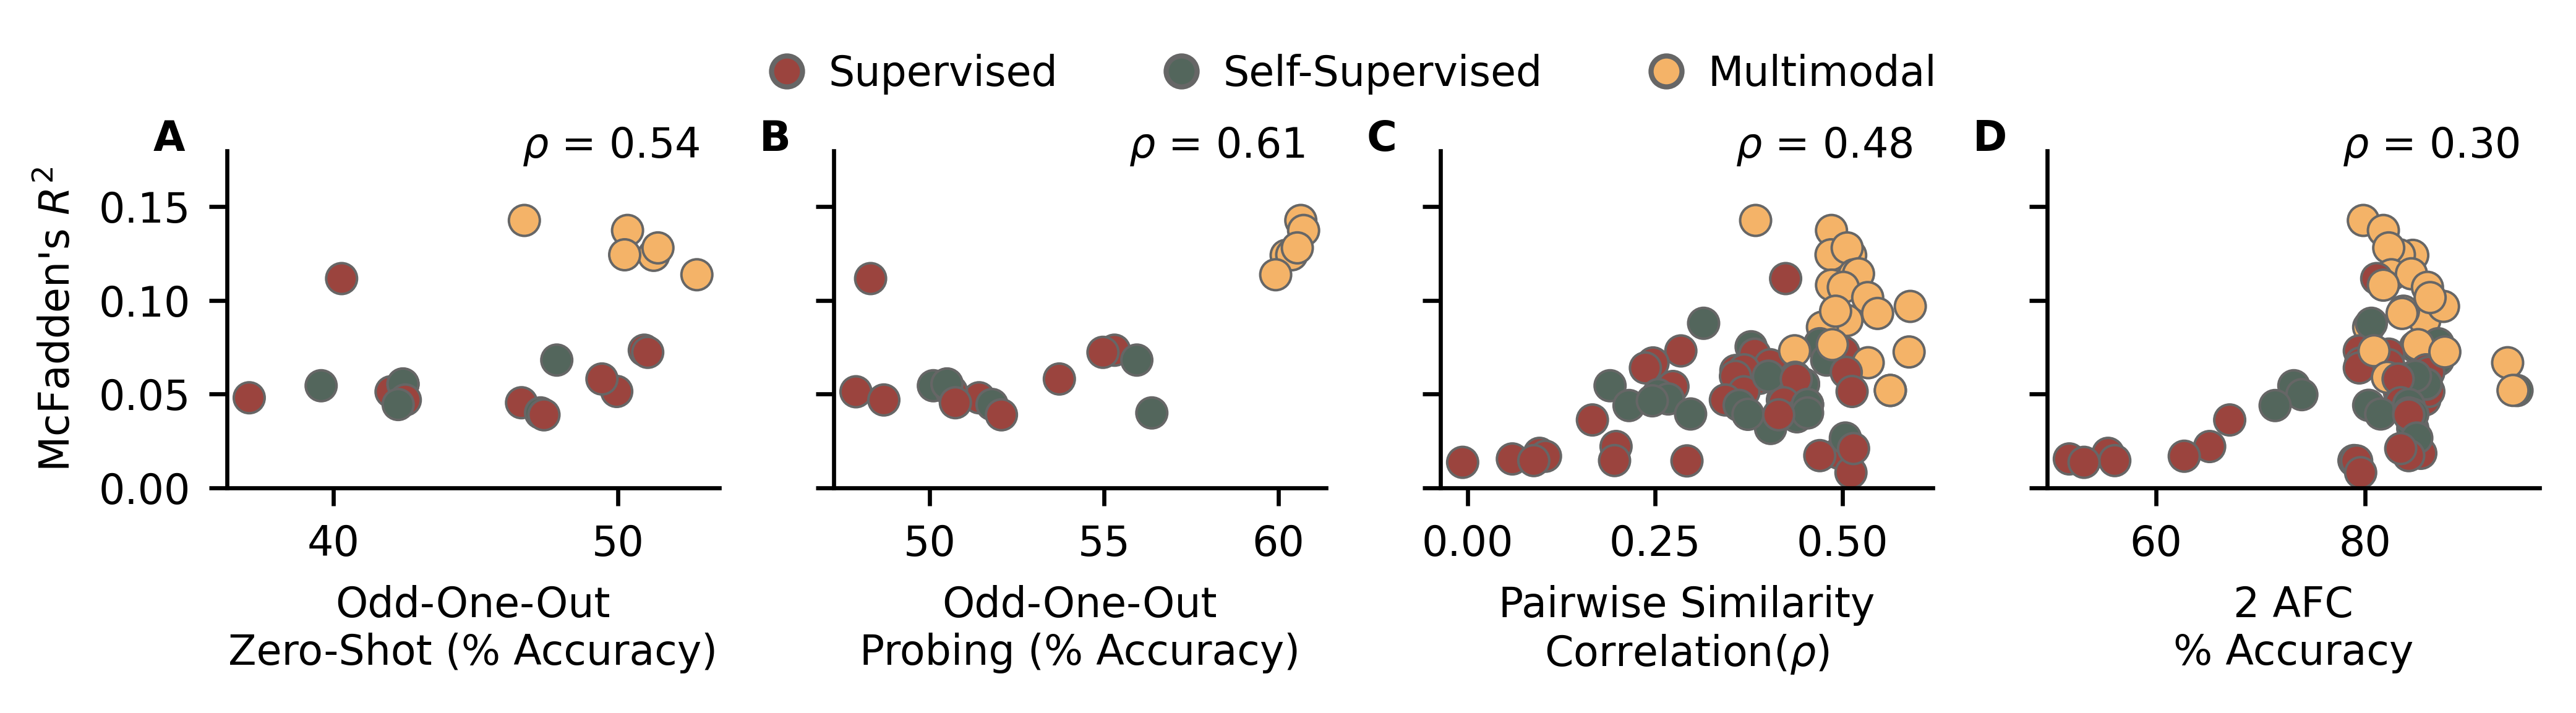

In [123]:
fig,axs = plt.subplots(1,4,figsize=(FIGWIDTH,FIGWIDTH/4), sharey=True)

merged_temp_df = merged_df[~merged_df.zero_shot.isna()]
merged_temp_df = merged_df[(~merged_df.probing.isna())]

                           
sns.scatterplot(data=merged_temp_df,x="zero_shot", y="nll",ax=axs[0],hue="color", edgecolor=cmap[-1],
    hue_order=[
        "supervised",
        "self-supervised",
        "multimodal",
    ],
    palette=cmap[1:-1],
    legend=False
)
sns.scatterplot(data=merged_temp_df,x="probing", y="nll",ax=axs[1],hue="color", edgecolor=cmap[-1],
    hue_order=[
        "supervised",
        "self-supervised",
        "multimodal",
    ],
    palette=cmap[1:-1],
    legend=False
)

peterson_df = merged_df[~merged_df.peterson.isna()]
sns.scatterplot(data=peterson_df,x="peterson", y="nll",ax=axs[2],hue="color", edgecolor=cmap[-1],
    hue_order=[
        "supervised",
        "self-supervised",
        "multimodal",
    ],
    palette=cmap[1:-1],
    legend=False
)

nights_df = merged_df[~merged_df.nights.isna()]
nights_df["nights"] = merged_df["nights"] * 100
sns.scatterplot(data=nights_df,x="nights", y="nll",ax=axs[3],hue="color", edgecolor=cmap[-1],
    hue_order=[
        "supervised",
        "self-supervised",
        "multimodal",
    ],
    palette=cmap[1:-1],
    legend=False
)

axs[0].set_xlabel("Odd-One-Out\nZero-Shot (% Accuracy)")
axs[1].set_xlabel("Odd-One-Out\nProbing (% Accuracy)")
axs[2].set_xlabel("Pairwise Similarity\nCorrelation"
                  r"($\rho$)")
axs[3].set_xlabel("2 AFC\n% Accuracy")

axs[0].set_ylabel(r"McFadden's $R^2$")
for i,ax in enumerate(axs.flatten()):
    ax.text(-0.15, 1.0, string.ascii_uppercase[i], transform=ax.transAxes, weight="bold")


custom_legend_lines = [
    Line2D(
        [0],
        [0],
        color=x,
        marker="o",
        markeredgecolor=cmap[-1],
        linestyle="-",
        linewidth=0,
    )
    for x in cmap[1:4]
]
hue_order = [
    "Supervised",
    "Self-Supervised",
    "Multimodal",
]
fig.legend(
    custom_legend_lines,
    hue_order,
    loc="center",
    bbox_to_anchor=(0.52, 1.0),
    ncol=5,
    frameon=False,
    handletextpad=0.01,
)


tau, p_value = spearmanr(merged_temp_df["nll"], merged_temp_df["zero_shot"])
print(p_value)
axs[0].text(0.6, 0.98, r"$\rho$ = {:.2f}".format(tau), transform=axs[0].transAxes)

tau, p_value = spearmanr(merged_temp_df["nll"], merged_temp_df["probing"])
print(p_value)
axs[1].text(0.6, 0.98, r"$\rho$ = {:.2f}".format(tau), transform=axs[1].transAxes)

tau, p_value = spearmanr(peterson_df["nll"], peterson_df["peterson"])
print(p_value)
axs[2].text(0.6, 0.98, r"$\rho$ = {:.2f}".format(tau), transform=axs[2].transAxes)

tau, p_value = spearmanr(nights_df["nll"], nights_df["nights"])
print(p_value)
axs[3].text(0.6, 0.98, r"$\rho$ = {:.2f}".format(tau), transform=axs[3].transAxes)

axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
y_ticks = np.array(range(0,16,5))/100
axs[0].yaxis.set_ticks(y_ticks)
axs[0].set_ybound(0,.18)

plt.tight_layout()

with mpl.rc_context(latex_context):
    fig.savefig(join(project_root, "figures","alignment_alignment.pdf"), bbox_inches='tight')

with mpl.rc_context(latex_context):
    fig.savefig(join(project_root, "figures","alignment_alignment.svg"), bbox_inches='tight')

with mpl.rc_context(latex_context):
    fig.savefig(join(project_root, "figures","alignment_alignment.png"), bbox_inches='tight')

In [70]:
merged_df[merged_df.feature_key =="dinov2_vitb16"]

Empty DataFrame
Columns: [features, color, feature_key, nll, return, model_size, zero_shot, probing, peterson, nights, training_data, r2, cka, id]
Index: []

In [125]:
slip_df = merged_df[merged_df['features'].str.contains('SLIP')]
slip_cmap = [cmap[3],cmap[2],cmap[3]]
def assign_size(feature):
    if "Base" in feature:
        return "Base"
    elif "Large" in feature:
        return "Large"
    else:
        return "Small"

def assign_loss(feature):
    if "CLIP" in feature:
        return "CLIP"
    elif "SimCLR" in feature:
        return "SimCLR"
    else:
        return "CLIP + SimCLR"
slip_df["Size"] = slip_df.features.apply(assign_size)
slip_df["Model"] = slip_df.features.apply(assign_loss)
slip_df['r2'] = slip_df['features'].map(r2_df.set_index('features')['r2'])
slip_df['cka'] = slip_df['features'].map(task_cka_df.set_index('features')['cka'])
slip_df['id'] = slip_df['features'].map(id_df.set_index('features')['local ID'])

/tmp/ipykernel_2754788/1096840738.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slip_df["Size"] = slip_df.features.apply(assign_size)
/tmp/ipykernel_2754788/1096840738.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slip_df["Model"] = slip_df.features.apply(assign_loss)
/tmp/ipykernel_2754788/1096840738.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

/tmp/ipykernel_2754788/1529648340.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_2754788/1529648340.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_2754788/1529648340.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_2754788/1529648340.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_2754788/1529648340.py:104: UserWarning: set_ticklabels() should only be used with

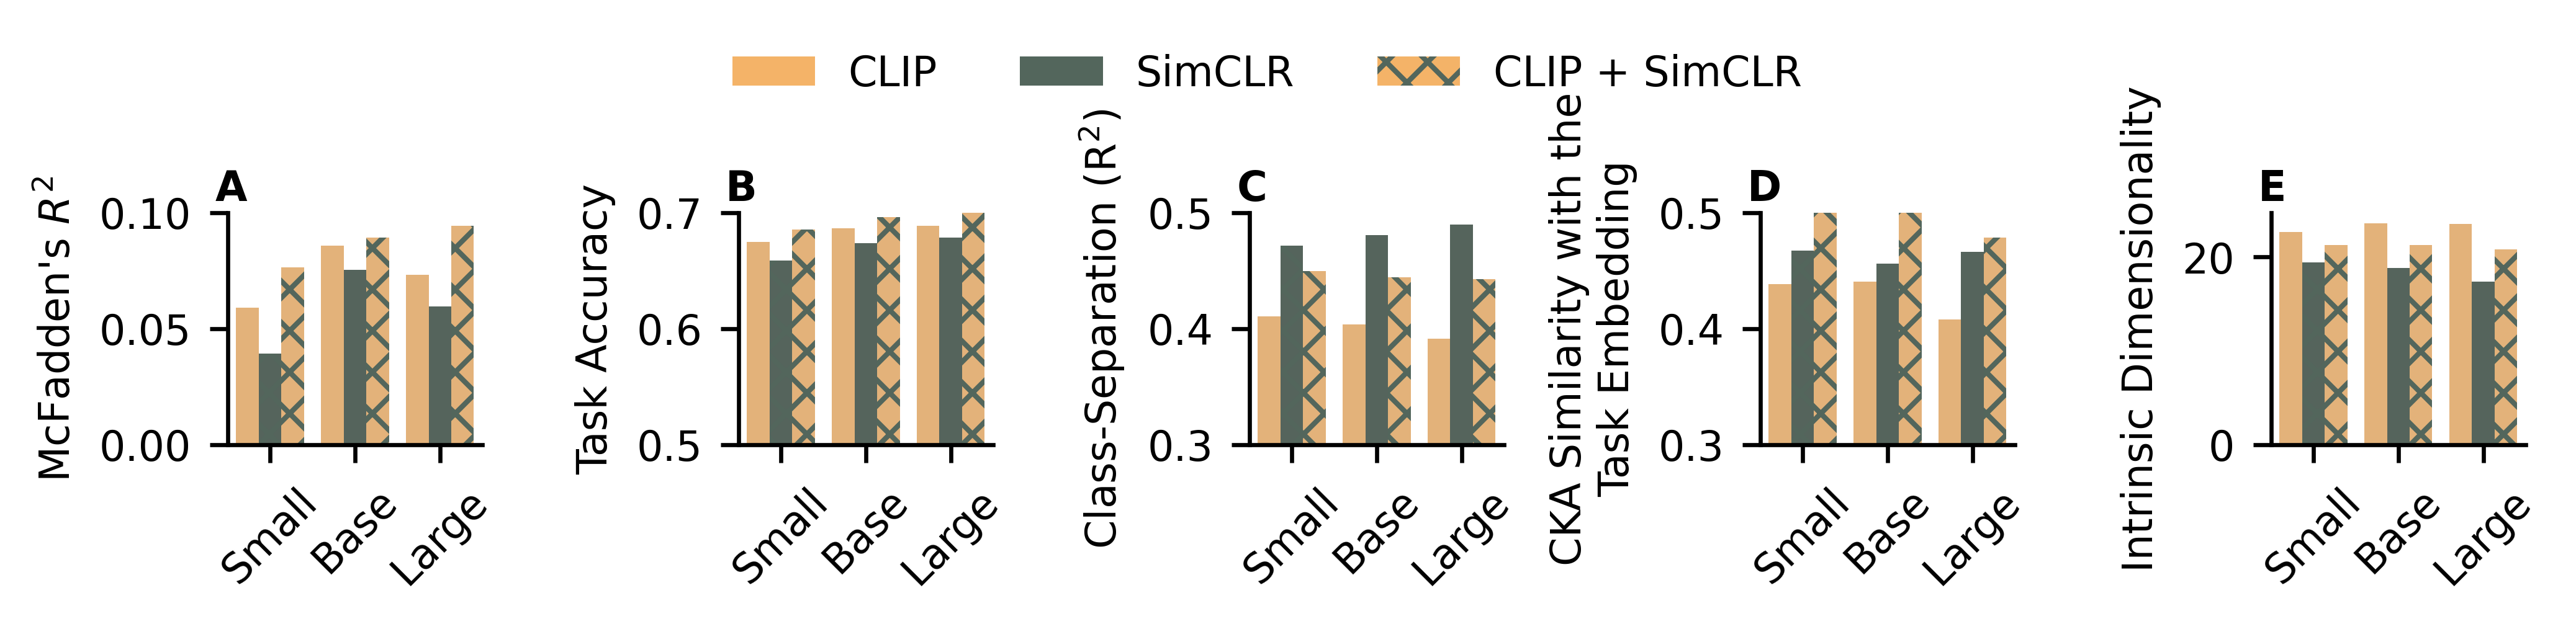

findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not

In [139]:
plt.rcParams.update({'hatch.color': cmap[2]})
fig, axs = plt.subplots(1,5, figsize=(FIGWIDTH, FIGWIDTH/5))


sns.barplot(data=slip_df,x="Size",y="nll",hue="Model",ax=axs[0],order=["Small", "Base", "Large"],palette=slip_cmap,hue_order=["CLIP","SimCLR","CLIP + SimCLR"])
#axs[0].set_ylim(9900,10500)
#axs[0].set_yticks(range(9600,10501,200))
axs[0].set_ylabel(r"McFadden's $R^2$")
axs[0].set_ylim(0,.1)
axs[0].set_xlabel("")
num_hue_levels = slip_df['Model'].nunique()
hatches = ["xxx" if x=="SimCLR" else "" for x in slip_df.Model.values] * num_hue_levels
hatches[6] = "xxx"
for hatch, patch in zip(hatches, axs[0].patches):
    patch.set_hatch(hatch)

sns.barplot(data=slip_df,x="Size",y="return",hue="Model",ax=axs[1],order=["Small", "Base", "Large"],palette=slip_cmap,hue_order=["CLIP","SimCLR","CLIP + SimCLR"])
axs[1].set_ylabel("Task Accuracy")
axs[1].set_xlabel("")
axs[1].set_ylim(.5,.7)
axs[1].set_yticks([.5,.6,.7])
num_hue_levels = slip_df['Model'].nunique()
hatches = ["xxx" if x=="SimCLR" else "" for x in slip_df.Model.values] * num_hue_levels
hatches[6] = "xxx"
for hatch, patch in zip(hatches, axs[1].patches):
    patch.set_hatch(hatch)


sns.barplot(data=slip_df,x="Size",y="r2",hue="Model",ax=axs[2],order=["Small", "Base", "Large"],palette=slip_cmap,hue_order=["CLIP","SimCLR","CLIP + SimCLR"])
axs[2].set_xlabel("")
axs[2].set_ylabel("Class-Separation (R$^2$)")
axs[2].set_ylim(.3,.5)
axs[2].set_yticks([.3,.4,.5])
num_hue_levels = slip_df['Model'].nunique()
hatches = ["xxx" if x=="SimCLR" else "" for x in slip_df.Model.values] * num_hue_levels
hatches[6] = "xxx"
for hatch, patch in zip(hatches, axs[2].patches):
    patch.set_hatch(hatch)

sns.barplot(data=slip_df,x="Size",y="cka",hue="Model",ax=axs[3],order=["Small", "Base", "Large"],palette=slip_cmap,hue_order=["CLIP","SimCLR","CLIP + SimCLR"])
axs[3].set_xlabel("")
axs[3].set_ylabel("CKA Similarity with the\nTask Embedding")
axs[3].set_ylim(.3,.5)
axs[3].set_yticks([.3,.4,.5])
num_hue_levels = slip_df['Model'].nunique()
hatches = ["xxx" if x=="SimCLR" else "" for x in slip_df.Model.values] * num_hue_levels
hatches[6] = "xxx"
for hatch, patch in zip(hatches, axs[3].patches):
    patch.set_hatch(hatch)

sns.barplot(data=slip_df,x="Size",y="id",hue="Model",ax=axs[4],order=["Small", "Base", "Large"],palette=slip_cmap,hue_order=["CLIP","SimCLR","CLIP + SimCLR"])
axs[4].set_xlabel("")
axs[4].set_ylabel("Intrinsic Dimensionality")
num_hue_levels = slip_df['Model'].nunique()
hatches = ["xxx" if x=="SimCLR" else "" for x in slip_df.Model.values] * num_hue_levels
hatches[6] = "xxx"
for hatch, patch in zip(hatches, axs[4].patches):
    patch.set_hatch(hatch)


for ax in axs:  

    ax.legend_.remove()



custom_legend_lines = [
    mpatches.Patch(
        facecolor=x,
        edgecolor=None,
        lw=2,
    )
    for x in [cmap[3],cmap[2]]
]


human_aligned_bar = mpatches.Patch(facecolor=cmap[3], edgecolor=None, hatch='xxx', label='Human Aligned')



# Append the new bar and label to the existing lists
custom_legend_lines.append(human_aligned_bar)
hue_order = [
    "CLIP",
    "SimCLR",
    "CLIP + SimCLR"
]
fig.legend(
    custom_legend_lines,
    hue_order,
    loc="center",
    bbox_to_anchor=(0.5, 1.08),
    ncol=6,
    frameon=False,
)


axs[0].text(-.05, 1.05, string.ascii_uppercase[0], transform=axs[0].transAxes, weight="bold")
axs[1].text(-.05, 1.05, string.ascii_uppercase[1], transform=axs[1].transAxes, weight="bold")
axs[2].text(-.05, 1.05, string.ascii_uppercase[2], transform=axs[2].transAxes, weight="bold")
axs[3].text(-.05, 1.05, string.ascii_uppercase[3], transform=axs[3].transAxes, weight="bold")
axs[4].text(-.05, 1.05, string.ascii_uppercase[4], transform=axs[4].transAxes, weight="bold")
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

with mpl.rc_context(latex_context):
    fig.savefig(join(project_root, "figures","neurips_slip_investigations.pdf"), bbox_inches='tight')

In [128]:
aligned_models = [
    "Harmonization_ResNet50",
    "Harmonization_ViT_B16",
    "Harmonization_tiny_ConvNeXT",
    "Harmonization_VGG16",
    "Harmonization_EfficientNetB0",
    "Harmonization_tiny_MaxViT",
    "Harmonization_LeViT_small",
    "DreamSim_open_clip_vitb32",
    "DreamSim_clip_vitb32",
    "gLocal_clip_RN50",
    "gLocal_clip_ViT-L_14",
    "gLocal_dinov2-vit-base-p14",
    "gLocal_dinov2-vit-large-p14",
    "gLocal_OpenCLIP_ViT-B-32_laion400m_e32",
    "gLocal_resnet18",
    "gLocal_resnet50"
    ]

base_models = [
    "resnet50",
    "vit_b_16",
    "convnext_tiny",
    "vgg16",
    "efficientnet",
    "maxvit",
    "levit",
    "OpenCLIP_ViT-B-32_laion400m_e32",
    "clip_ViT-B_32",
    "clip_RN50",
    "clip_ViT-L_14",
    "dinov2-vit-base-p14",
    "dinov2-vit-large-p14",
    "OpenCLIP_ViT-B-32_laion400m_e32",
    "resnet18",
    "resnet50"
]

alignment_df = {
    "Alignment": [],
    "Model" : [],
    "nll" : [],
    "return": [],
    "r2" : [],
    "cka" : [],
    "id": [],
    "colour" : [],
}

for aligned, base in zip(aligned_models, base_models):
    
    alignment_type = aligned.split("_")[0]
    alignment_df["Alignment"].append(alignment_type)
    
    alignment_df["Model"].append(base)

    delta_nll = merged_df[merged_df.feature_key == aligned]["nll"].values - merged_df[merged_df.feature_key == base]["nll"].values
    alignment_df["nll"].append(delta_nll[0])
    delta_return =  merged_df[merged_df.feature_key == aligned]["return"].values - merged_df[merged_df.feature_key == base]["return"].values
    alignment_df["return"].append(delta_return[0])

    delta_r2 = r2_df[r2_df.feature_key == aligned]["r2"].values - r2_df[r2_df.feature_key == base]["r2"].values
    alignment_df["r2"].append(delta_r2[0])

    delta_cka = task_cka_df[task_cka_df.feature == aligned]["cka"].values - task_cka_df[task_cka_df.feature == base]["cka"].values
    alignment_df["cka"].append(delta_cka[0])

    delta_id = id_df[id_df.Feature == aligned]["local ID"].values - id_df[id_df.Feature == base]["local ID"].values
    alignment_df["id"].append(delta_id[0])

    if ("CLIP" in base) or ("clip" in base):
        alignment_df["colour"].append("Multimodal")
    elif "dino" in base:
        alignment_df["colour"].append("Self-Supervised")
    else:
        alignment_df["colour"].append("Supervised")





alignment_df = pd.DataFrame(alignment_df)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [54]:
merged_df

features            color           feature_key       nll  \
0      CLIP-ViT-L/14       multimodal         clip_ViT-L_14  0.142718   
1      CLIP-ViT-B/16       multimodal         clip_ViT-B_16  0.137379   
2         CLIP-RN101       multimodal            clip_RN101  0.124082   
3        CLIP-RN50x4       multimodal           clip_RN50x4  0.124377   
4      CLIP-ViT-B/32       multimodal         clip_ViT-B_32  0.128061   
..               ...              ...                   ...       ...   
76     DINO-V2-ViT-S  self-supervised  dinov2-vit-small-p14  0.026491   
77          MaXViT-T       supervised                maxvit  0.014275   
78   EfficientNet B0       supervised          efficientnet  0.017099   
79  Inception-ecoset       supervised      Inception_ecoset  0.008009   
80             vgg16       supervised                 vgg16  0.020869   

      return model_size  zero_shot  probing  peterson training_data       cka  \
0   0.723199     427.62      46.71    60.64  0.384368     400000000  0.581588   
1   0.721027     149.62      50.34    60.72  0.485542     400000000  0.606753   
2   0.702481     119.69      51.26    60.22  0.511140     400000000  0.614102   
3   0.705224      178.3      50.24    60.38  0.484924     400000000  0.600338   
4   0.717147     151.28      51.41    60.54  0.506460     400000000  0.607009   
..       ...        ...        ...      ...       ...           ...       ...   
76  0.644156      22.06        NaN      NaN  0.504069     142000000  0.270234   
77  0.603731      30.40        NaN      NaN  0.292777       1281167  0.254958   
78  0.637730       4.01        NaN      NaN  0.469961       1281167  0.240714   
79  0.655476      25.94        NaN      NaN  0.511514       1500000  0.371303   
80  0.673898     134.26        NaN      NaN  0.514973       1281167  0.428651   

           id  
0   14.088820  
1   14.904553  
2   16.325872  
3   15.914236  
4   16.024260  
..        ...  
76  14.240664  
77  16.233322  
78  20.613144  
79  21.518368  
80  20.105993  

[81 rows x 12 columns]

In [129]:
aligned_models = [
    "Harmonization_ResNet50",
    "Harmonization_ViT_B16",
    "Harmonization_tiny_ConvNeXT",
    "Harmonization_VGG16",
    "Harmonization_EfficientNetB0",
    "Harmonization_tiny_MaxViT",
    "Harmonization_LeViT_small",
    "DreamSim_open_clip_vitb32",
    "DreamSim_clip_vitb32",
    "DreamSim_dino_vitb16",
    "gLocal_clip_RN50",
    "gLocal_clip_ViT-L_14",
    "gLocal_dinov2-vit-base-p14",
    "gLocal_dinov2-vit-large-p14",
    "gLocal_OpenCLIP_ViT-B-32_laion400m_e32",
    "gLocal_resnet18",
    "gLocal_resnet50"
    ]

base_models = [
    "resnet50",
    "vit_b_16",
    "convnext_tiny",
    "vgg16",
    "efficientnet",
    "maxvit",
    "levit",
    "OpenCLIP_ViT-B-32_laion400m_e32",
    "clip_ViT-B_32",
    "dinov2-vit-base-p14",
    "clip_RN50",
    "clip_ViT-L_14",
    "dinov2-vit-base-p14",
    "dinov2-vit-large-p14",
    "OpenCLIP_ViT-B-32_laion400m_e32",
    "resnet18",
    "resnet50"
]

alignment_task_df = {
    "Alignment": [],
    "Model" : [],
    "nll" : [],
    "zero_shot": [],
    "probing": [],
    "peterson": [],
    "nights": [],
    "colour": []
}

for aligned, base in zip(aligned_models, base_models):
    print(aligned,base)
    
    alignment_type = aligned.split("_")[0]
    alignment_task_df["Alignment"].append(alignment_type)
    
    alignment_task_df["Model"].append(base)

    delta_nll = merged_df[merged_df.feature_key == aligned]["nll"].values - merged_df[merged_df.feature_key == base]["nll"].values
    alignment_task_df["nll"].append(delta_nll[0])
    

    delta_zero = merged_df[merged_df.feature_key == aligned]["zero_shot"].values - merged_df[merged_df.feature_key == base]["zero_shot"].values
    alignment_task_df["zero_shot"].append(delta_zero[0])

    delta_probing = merged_df[merged_df.feature_key == aligned]["probing"].values - merged_df[merged_df.feature_key == base]["probing"].values
    alignment_task_df["probing"].append(delta_probing[0])

    delta_peterson = merged_df[merged_df.feature_key == aligned]["peterson"].values - merged_df[merged_df.feature_key == base]["peterson"].values
    alignment_task_df["peterson"].append(delta_peterson[0])

    delta_nights = merged_df[merged_df.feature_key == aligned]["nights"].values - merged_df[merged_df.feature_key == base]["nights"].values
    alignment_task_df["nights"].append(delta_nights[0])

    if ("CLIP" in base) or ("clip" in base):
        alignment_task_df["colour"].append("Multimodal")
    elif "dino" in base:
        alignment_task_df["colour"].append("Self-Supervised")
    else:
        alignment_task_df["colour"].append("Supervised")


alignment_task_df = pd.DataFrame(alignment_task_df)


Harmonization_ResNet50 resnet50
Harmonization_ViT_B16 vit_b_16
Harmonization_tiny_ConvNeXT convnext_tiny
Harmonization_VGG16 vgg16
Harmonization_EfficientNetB0 efficientnet
Harmonization_tiny_MaxViT maxvit
Harmonization_LeViT_small levit
DreamSim_open_clip_vitb32 OpenCLIP_ViT-B-32_laion400m_e32
DreamSim_clip_vitb32 clip_ViT-B_32
DreamSim_dino_vitb16 dinov2-vit-base-p14
gLocal_clip_RN50 clip_RN50
gLocal_clip_ViT-L_14 clip_ViT-L_14
gLocal_dinov2-vit-base-p14 dinov2-vit-base-p14
gLocal_dinov2-vit-large-p14 dinov2-vit-large-p14
gLocal_OpenCLIP_ViT-B-32_laion400m_e32 OpenCLIP_ViT-B-32_laion400m_e32
gLocal_resnet18 resnet18
gLocal_resnet50 resnet50


In [130]:
alignment_task_df

Alignment                            Model       nll  zero_shot  \
0   Harmonization                         resnet50 -0.041246        NaN   
1   Harmonization                         vit_b_16 -0.029250        NaN   
2   Harmonization                    convnext_tiny -0.017869        NaN   
3   Harmonization                            vgg16 -0.006410        NaN   
4   Harmonization                     efficientnet -0.003587        NaN   
5   Harmonization                           maxvit  0.004039        NaN   
6   Harmonization                            levit  0.000885        NaN   
7        DreamSim  OpenCLIP_ViT-B-32_laion400m_e32 -0.044864        NaN   
8        DreamSim                    clip_ViT-B_32 -0.061345        NaN   
9        DreamSim              dinov2-vit-base-p14  0.014040        NaN   
10         gLocal                        clip_RN50 -0.020671        NaN   
11         gLocal                    clip_ViT-L_14 -0.034563        NaN   
12         gLocal              dinov2-vit-base-p14 -0.006221        NaN   
13         gLocal             dinov2-vit-large-p14  0.043829        NaN   
14         gLocal  OpenCLIP_ViT-B-32_laion400m_e32 -0.024330        NaN   
15         gLocal                         resnet18 -0.006618        NaN   
16         gLocal                         resnet50  0.013283        NaN   

    probing  peterson    nights           colour  
0       NaN -0.334429 -0.204342       Supervised  
1       NaN -0.170601 -0.181354       Supervised  
2       NaN -0.107457 -0.160920       Supervised  
3       NaN -0.318756 -0.044700       Supervised  
4       NaN -0.476363 -0.310345       Supervised  
5       NaN -0.196642 -0.237548       Supervised  
6       NaN -0.028562 -0.043423       Supervised  
7       NaN -0.026729  0.066411       Multimodal  
8       NaN  0.028057  0.113665       Multimodal  
9       NaN  0.124776  0.102171  Self-Supervised  
10      NaN  0.031252  0.010217       Multimodal  
11      NaN  0.101205  0.019157       Multimodal  
12      NaN -0.035087  0.002554  Self-Supervised  
13      NaN -0.047365  0.002554  Self-Supervised  
14      NaN -0.001599  0.001277       Multimodal  
15      NaN -0.098176 -0.034483       Supervised  
16      NaN -0.055287 -0.008940       Supervised

In [131]:
alignment_task_df["nights"] = alignment_task_df["nights"].astype(np.float64) * 100
alignment_task_df

Alignment                            Model       nll  zero_shot  \
0   Harmonization                         resnet50 -0.041246        NaN   
1   Harmonization                         vit_b_16 -0.029250        NaN   
2   Harmonization                    convnext_tiny -0.017869        NaN   
3   Harmonization                            vgg16 -0.006410        NaN   
4   Harmonization                     efficientnet -0.003587        NaN   
5   Harmonization                           maxvit  0.004039        NaN   
6   Harmonization                            levit  0.000885        NaN   
7        DreamSim  OpenCLIP_ViT-B-32_laion400m_e32 -0.044864        NaN   
8        DreamSim                    clip_ViT-B_32 -0.061345        NaN   
9        DreamSim              dinov2-vit-base-p14  0.014040        NaN   
10         gLocal                        clip_RN50 -0.020671        NaN   
11         gLocal                    clip_ViT-L_14 -0.034563        NaN   
12         gLocal              dinov2-vit-base-p14 -0.006221        NaN   
13         gLocal             dinov2-vit-large-p14  0.043829        NaN   
14         gLocal  OpenCLIP_ViT-B-32_laion400m_e32 -0.024330        NaN   
15         gLocal                         resnet18 -0.006618        NaN   
16         gLocal                         resnet50  0.013283        NaN   

    probing  peterson     nights           colour  
0       NaN -0.334429 -20.434227       Supervised  
1       NaN -0.170601 -18.135377       Supervised  
2       NaN -0.107457 -16.091954       Supervised  
3       NaN -0.318756  -4.469987       Supervised  
4       NaN -0.476363 -31.034483       Supervised  
5       NaN -0.196642 -23.754789       Supervised  
6       NaN -0.028562  -4.342273       Supervised  
7       NaN -0.026729   6.641124       Multimodal  
8       NaN  0.028057  11.366539       Multimodal  
9       NaN  0.124776  10.217114  Self-Supervised  
10      NaN  0.031252   1.021711       Multimodal  
11      NaN  0.101205   1.915709       Multimodal  
12      NaN -0.035087   0.255428  Self-Supervised  
13      NaN -0.047365   0.255428  Self-Supervised  
14      NaN -0.001599   0.127714       Multimodal  
15      NaN -0.098176  -3.448276       Supervised  
16      NaN -0.055287  -0.893997       Supervised

findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not

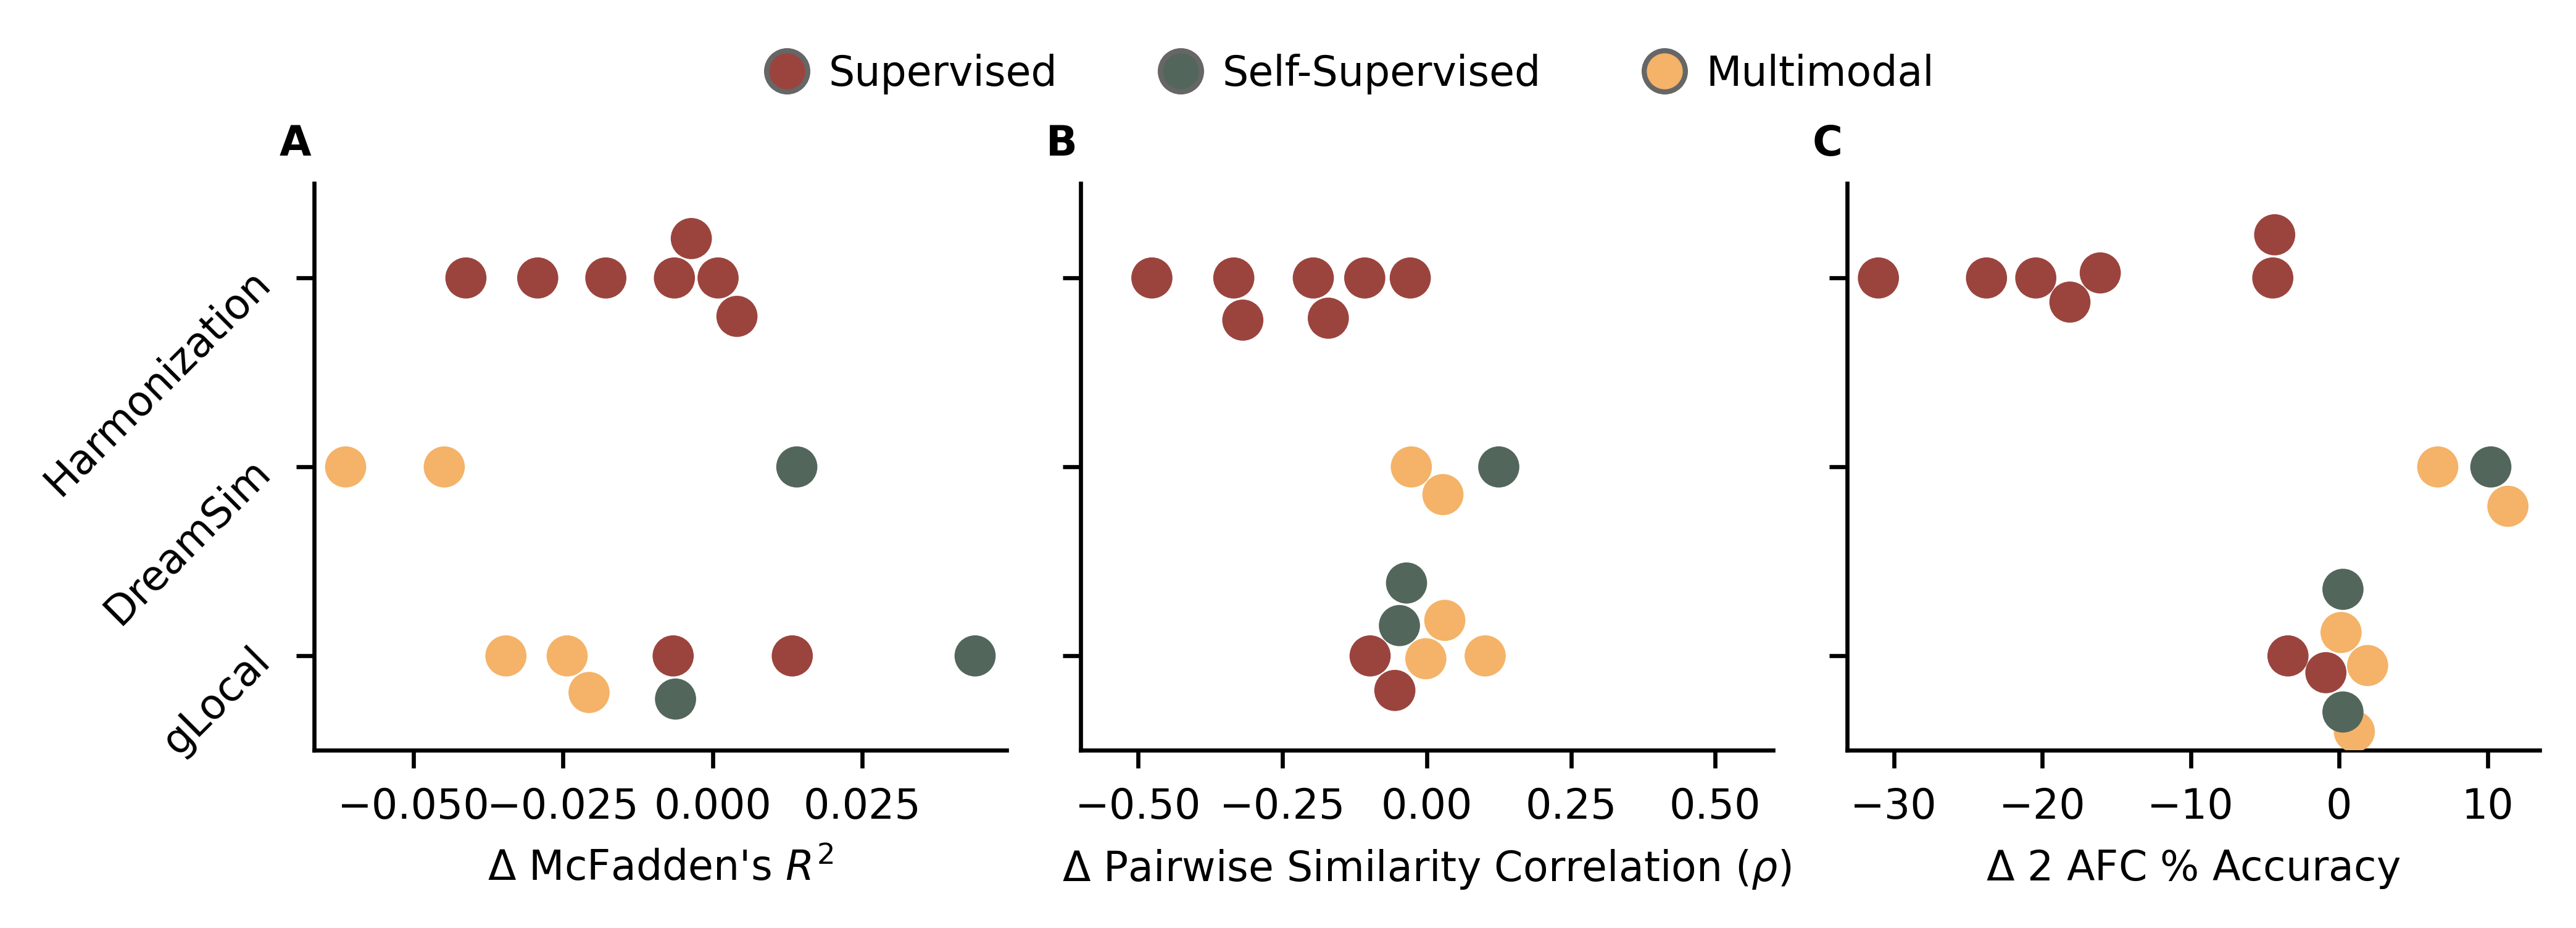

In [132]:
fig, axs = plt.subplots(1,3, figsize=(FIGWIDTH, FIGWIDTH/3),sharey=True)
size=8
sns.swarmplot(data=alignment_task_df,y="Alignment",x="nll",ax=axs[0],hue="colour",size=size,palette=cmap[1:4],hue_order=["Supervised", "Self-Supervised", "Multimodal"],edgecolor=cmap[-1])
axs[0].legend_.remove()
axs[0].set_xlabel(r"$\Delta$ McFadden's $R^2$")
axs[0].set_ylabel("")

# sns.swarmplot(data=alignment_task_df,y="Alignment",x="zero_shot",ax=axs[1],hue="colour",palette=cmap[1:4],hue_order=["Supervised", "Self-Supervised", "Multimodal"])
# axs[1].legend_.remove()
# axs[1].set_xlabel(r"$\Delta$ Odd-One-Out\nZero Shot Alignment (%)")
# axs[1].set_ylabel("")
# axs[1].set_xlim([-.2,.2])
# axs[1].set_xticks([-.15,0,.15])


# sns.swarmplot(data=alignment_task_df,y="Alignment",x="probing",ax=axs[2],hue="colour",palette=cmap[1:4],hue_order=["Supervised", "Self-Supervised", "Multimodal"])
# axs[2].legend_.remove()
# axs[2].set_xlabel(r"$\Delta$ Odd-One-Out\nProbiing Alignment (%)")
# axs[2].set_ylabel("")
# axs[2].set_xlim([-.4,.4])
# axs[2].set_xticks([-.2,0,.2])

sns.swarmplot(data=alignment_task_df,y="Alignment",x="peterson",ax=axs[1],hue="colour",size=size, palette=cmap[1:4],hue_order=["Supervised", "Self-Supervised", "Multimodal"],edgecolor=cmap[-1])
axs[1].legend_.remove()
axs[1].set_xlabel(r"$\Delta$ Pairwise Similarity Correlation ($\rho$)")
axs[1].set_ylabel("")
axs[1].set_xlim([-.6,.6])


axs[0].text(-.05, 1.05, string.ascii_uppercase[0], transform=axs[0].transAxes, weight="bold")
axs[1].text(-.05, 1.05, string.ascii_uppercase[1], transform=axs[1].transAxes, weight="bold")
axs[2].text(-.05, 1.05, string.ascii_uppercase[2], transform=axs[2].transAxes, weight="bold")
# axs[3].text(-.05, 1.05, string.ascii_uppercase[3], transform=axs[3].transAxes, weight="bold")
sns.swarmplot(data=alignment_task_df,y="Alignment",x="nights",ax=axs[2],hue="colour",size=size, palette=cmap[1:4],hue_order=["Supervised", "Self-Supervised", "Multimodal"],edgecolor=cmap[-1])
axs[2].legend_.remove()
axs[2].set_xlabel(r"$\Delta$ 2 AFC % Accuracy")
axs[2].set_ylabel("")


custom_legend_lines = [
    Line2D(
        [0],
        [0],
        color=x,
        marker="o",
        markeredgecolor=cmap[-1],
        markersize=size,
        linestyle="-",
        linewidth=0,
    )
    for x in cmap[1:4]
]
hue_order = [
    "Supervised",
    "Self-Supervised",
    "Multimodal",
]
fig.legend(
    custom_legend_lines,
    hue_order,
    loc="center",
    bbox_to_anchor=(0.52, 1.),
    ncol=3,
    frameon=False,
    handletextpad=0.01,
)


yticklabels = alignment_task_df['Alignment'].drop_duplicates().tolist()

# Set the y-tick labels for the first subplot
axs[0].set_yticklabels(yticklabels,rotation=45)


plt.tight_layout()



with mpl.rc_context(latex_context):
    fig.savefig(join(project_root, "figures","neurips_task_alignment.pdf"), bbox_inches='tight')

/var/folders/2t/zlktsbp913sc2d_5zx40s3rh0000gn/T/ipykernel_90261/2967575769.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(
/var/folders/2t/zlktsbp913sc2d_5zx40s3rh0000gn/T/ipykernel_90261/2967575769.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(


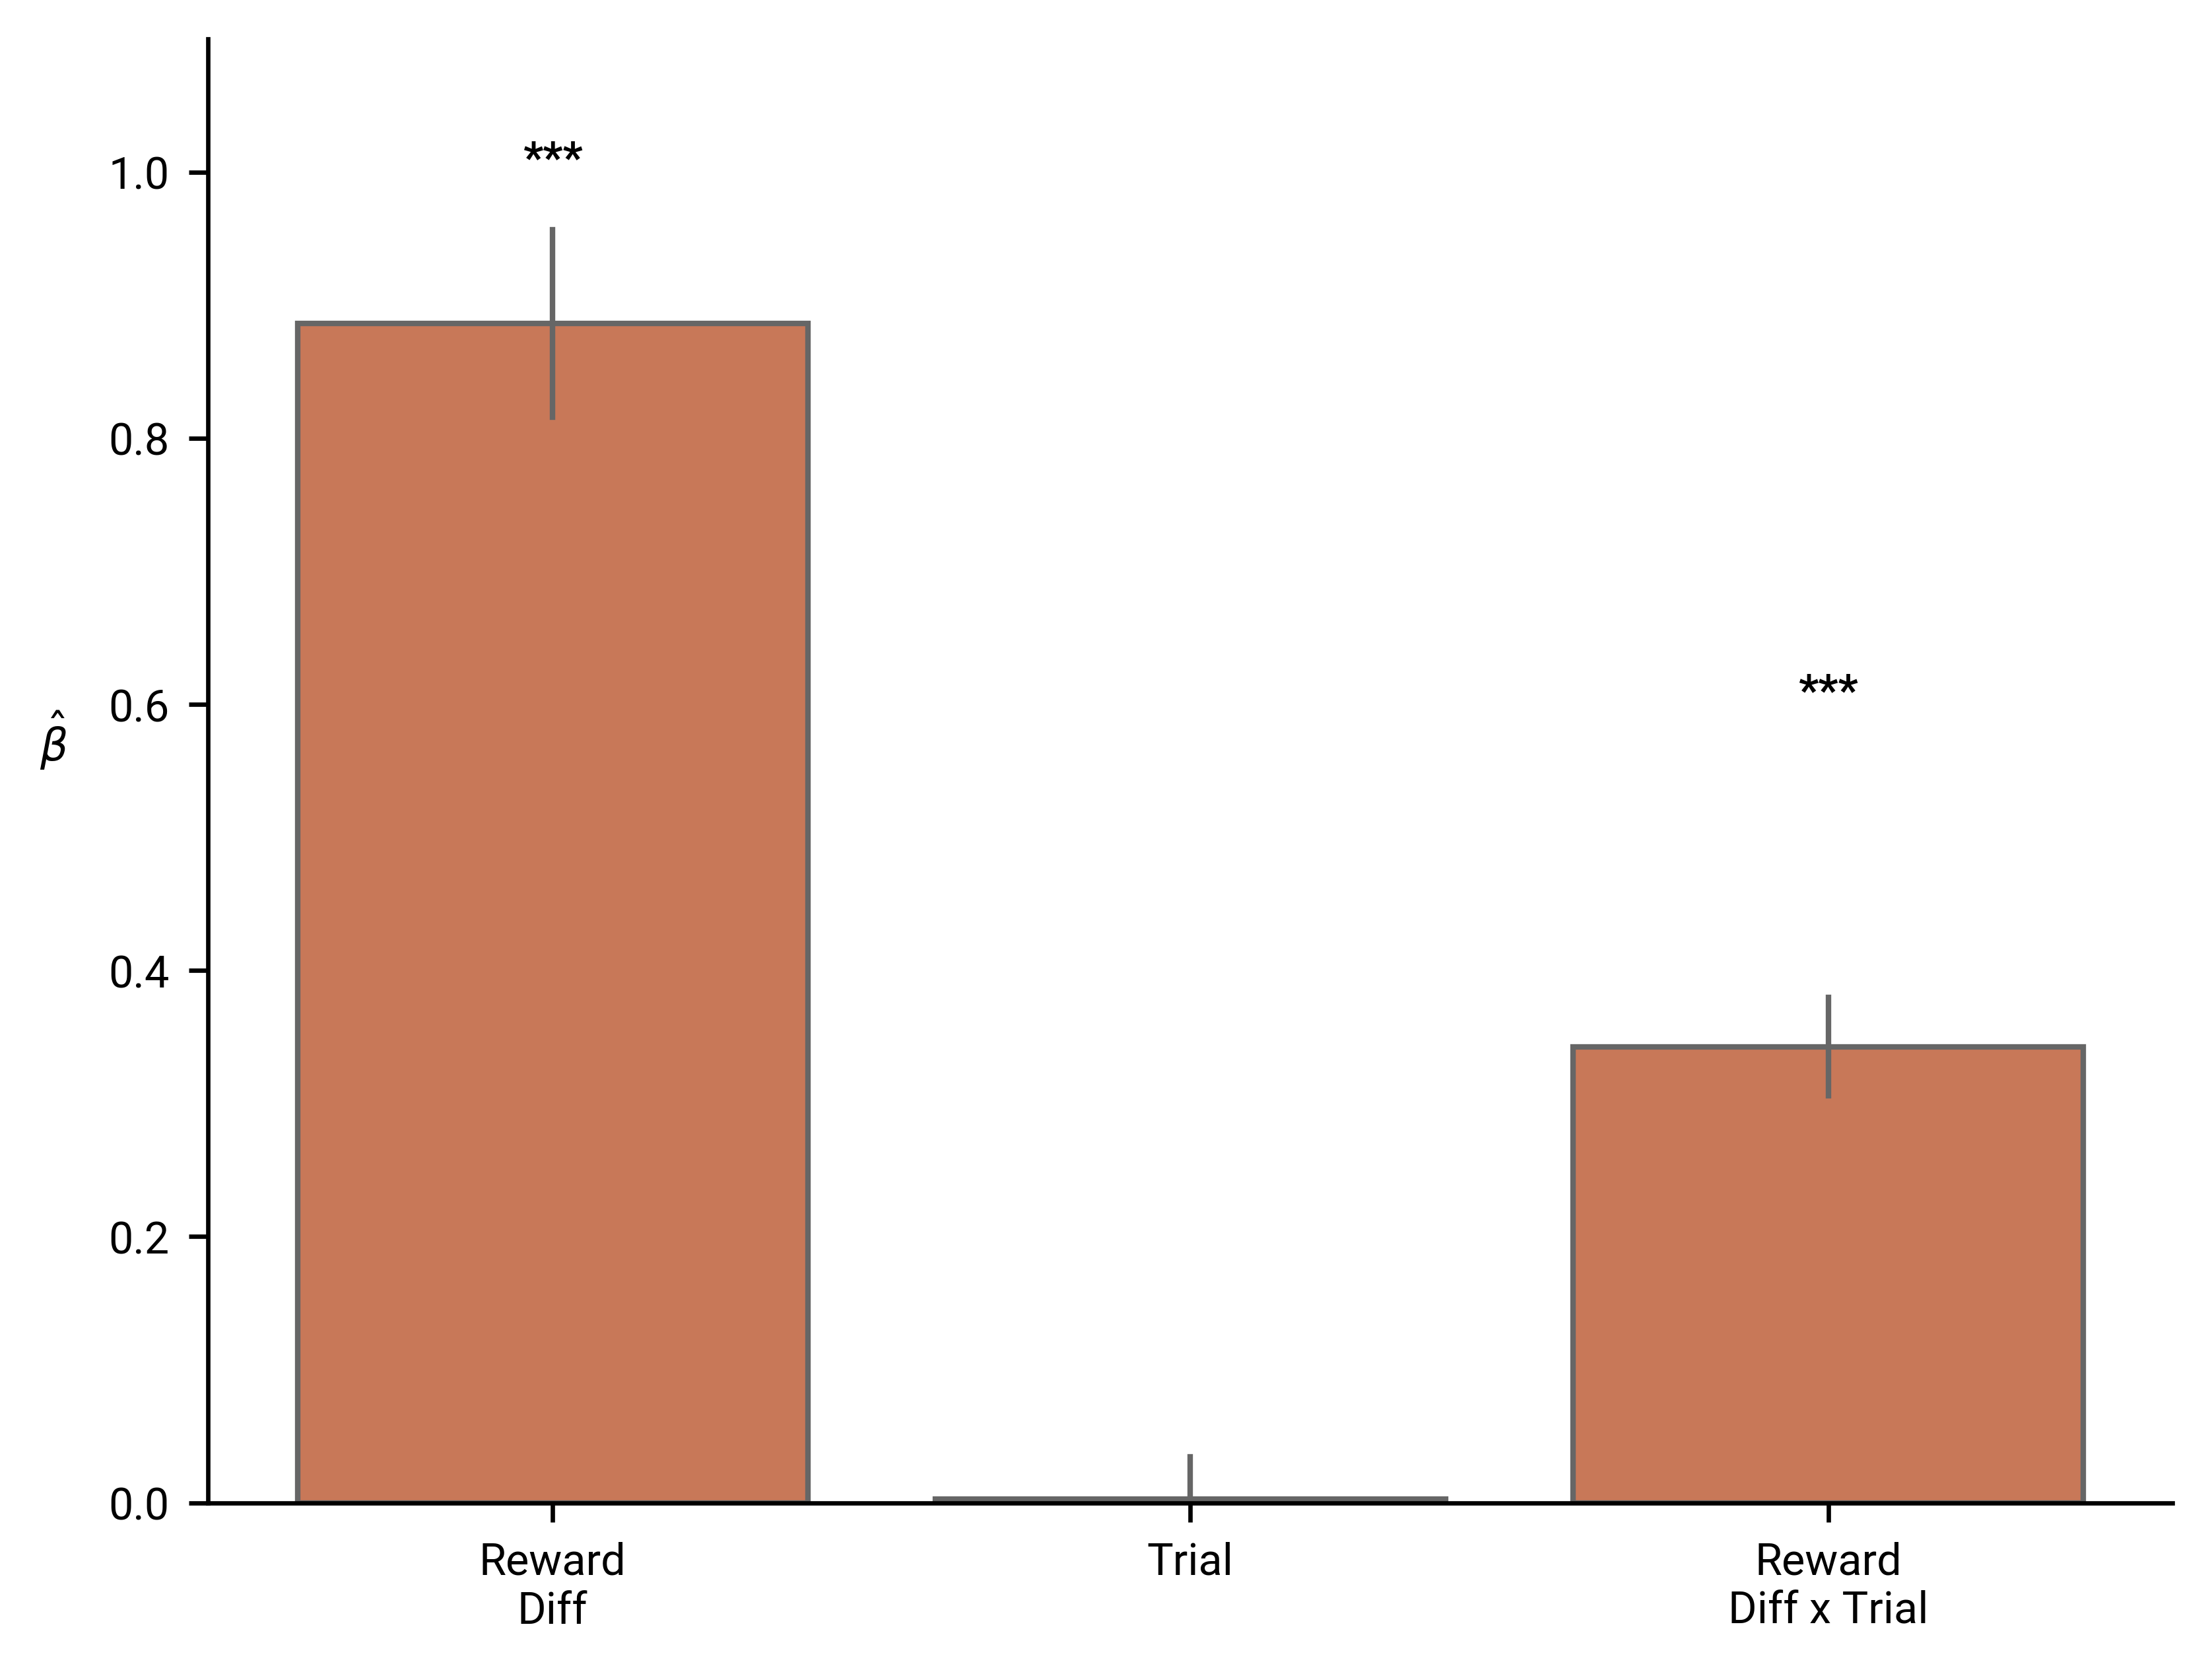

In [28]:
fig, ax01 =plt.subplots()
glmm_df = pd.read_csv(
    join(project_root, "data", "human_behavioural", "reward_learning", "glmm.csv")
)
glmm_df = glmm_df.replace(
    ["trial", "rl_diff", "trial:rl_diff"],
    ["Trial", "Reward\nDiff", "Reward\nDiff x Trial"],
)
glmm_df = glmm_df.reindex([1, 0, 2])
ax01.bar(glmm_df["term"], glmm_df["estimate"], color=cmap[-2], edgecolor=cmap[-1], lw=1)
ax01.set_ylabel(r"$\hat{\beta}$", rotation=0, labelpad=10)
ax01.set_ylim(ymin=0, ymax=1.1)
ax01.annotate("***", xy=("Reward\nDiff", 1.0), weight="bold", ha="center")
ax01.annotate("***", xy=("Reward\nDiff x Trial", 0.6), weight="bold", ha="center")


for regressor in glmm_df["term"].values:
    ax01.plot(
        [regressor, regressor],
        [
            float(
                glmm_df[glmm_df["term"] == regressor]["estimate"]
                + glmm_df[glmm_df["term"] == regressor]["std.error"]
            ),
            float(
                glmm_df[glmm_df["term"] == regressor]["estimate"]
                - glmm_df[glmm_df["term"] == regressor]["std.error"]
            ),
        ],
        color=cmap[-1],
        lw=1,
    )

with mpl.rc_context(latex_context):
    fig.savefig(join(project_root, "figures","neurips_reward_regression.pdf"), bbox_inches='tight')
with mpl.rc_context(latex_context):
    fig.savefig(join(project_root, "figures","neurips_reward_regression.svg"), bbox_inches='tight')

/var/folders/2t/zlktsbp913sc2d_5zx40s3rh0000gn/T/ipykernel_90261/141850876.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  [float(glmm_df[glmm_df['term']==regressor]['estimate'] + glmm_df[glmm_df['term']==regressor]['std.error']),
/var/folders/2t/zlktsbp913sc2d_5zx40s3rh0000gn/T/ipykernel_90261/141850876.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(glmm_df[glmm_df['term']==regressor]['estimate'] - glmm_df[glmm_df['term']==regressor]['std.error'])],


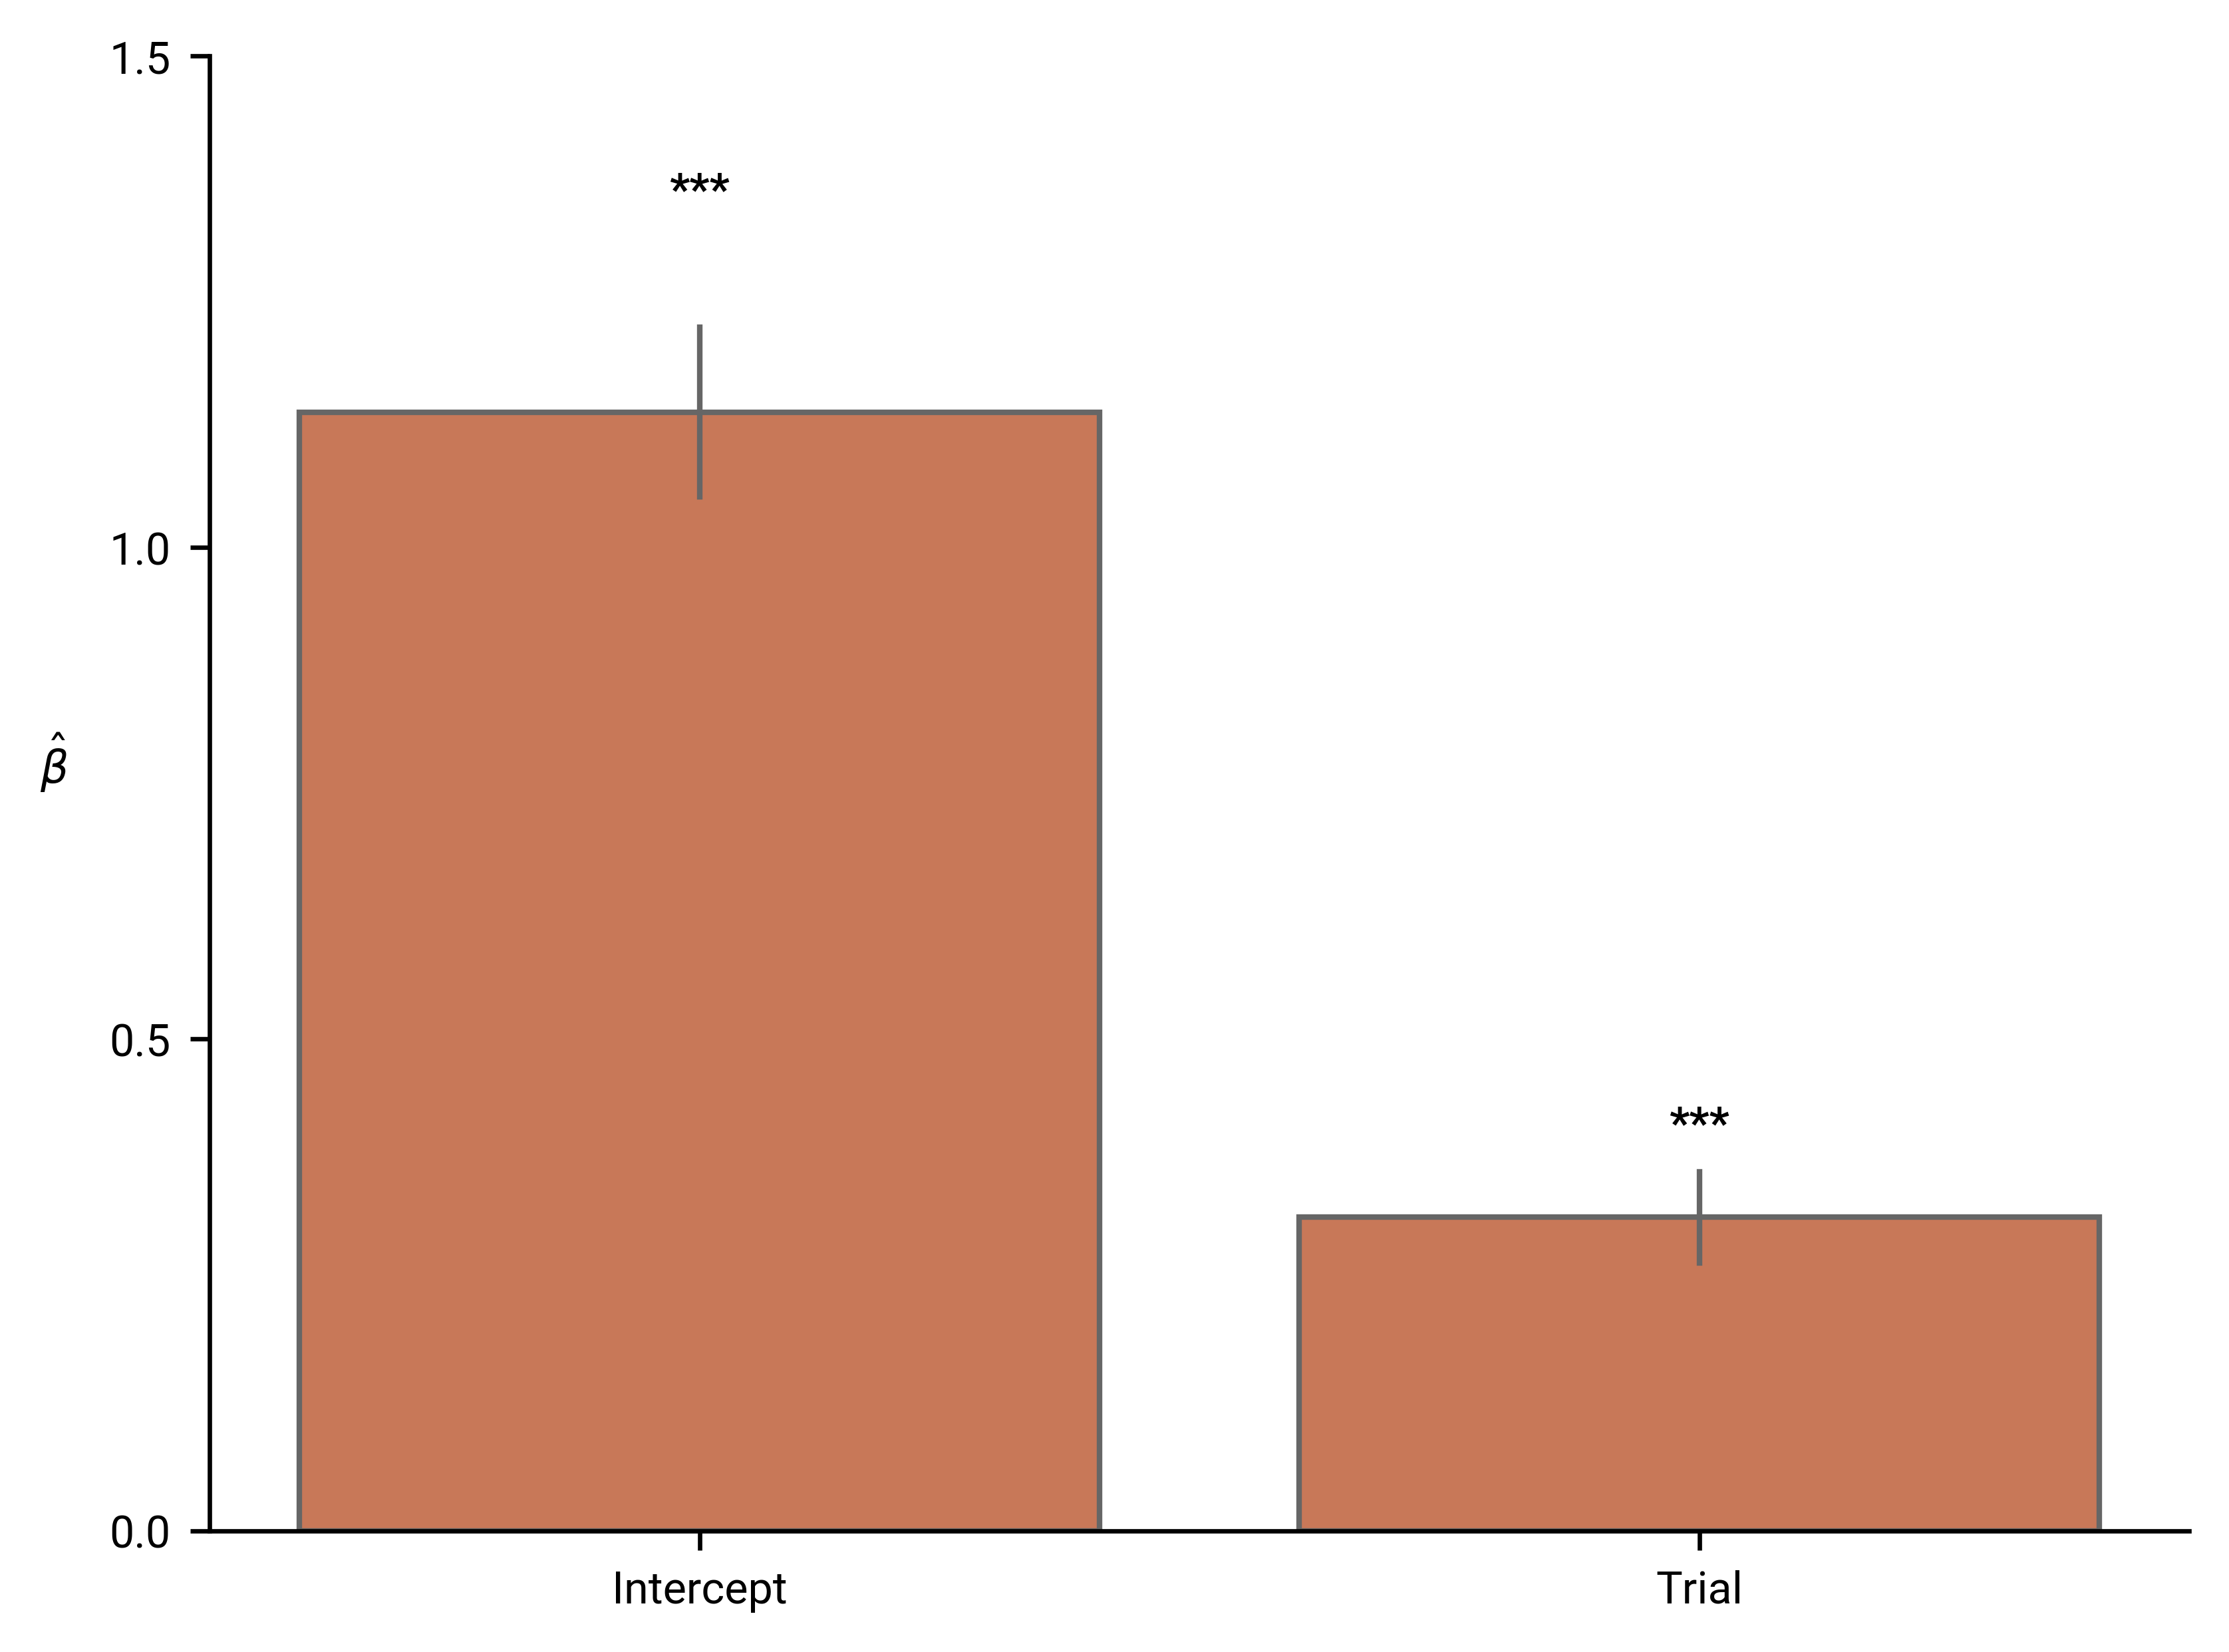

In [29]:
fig, ax01 = plt.subplots()
glmm_df = pd.read_csv(join(project_root, "data", "human_behavioural", "category_learning", "glmm.csv"))
glmm_df = glmm_df.replace(['(Intercept)', 'trial'], ["Intercept", "Trial"])
ax01.bar(glmm_df['term'],glmm_df['estimate'],color=cmap[-2],edgecolor=cmap[-1],lw=1,width=0.8)
ax01.set_ylabel(r'$\hat{\beta}$',rotation=0,labelpad=10)
ax01.set_ylim(ymin=0,ymax=1.5)
ax01.set_yticks([0,.5,1,1.5])


for regressor in glmm_df['term'].values:

    ax01.plot([regressor,regressor],
    [float(glmm_df[glmm_df['term']==regressor]['estimate'] + glmm_df[glmm_df['term']==regressor]['std.error']),
    float(glmm_df[glmm_df['term']==regressor]['estimate'] - glmm_df[glmm_df['term']==regressor]['std.error'])],
    color=cmap[-1],lw=1)

    

ax01.annotate('***',xy=('Intercept', 1.35), weight='bold',ha='center')
ax01.annotate('***', xy=('Trial', .4), weight='bold',ha='center')

with mpl.rc_context(latex_context):
    fig.savefig(join(project_root, "figures","neurips_category_regression.pdf"), bbox_inches='tight')
with mpl.rc_context(latex_context):
    fig.savefig(join(project_root, "figures","neurips_category_regression.svg"), bbox_inches='tight')

/var/folders/2t/zlktsbp913sc2d_5zx40s3rh0000gn/T/ipykernel_90261/389605688.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_yticklabels(yticklabels,rotation=45)
/Users/candemircan/miniconda3/envs/naturalcogsci/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/candemircan/miniconda3/envs/naturalcogsci/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


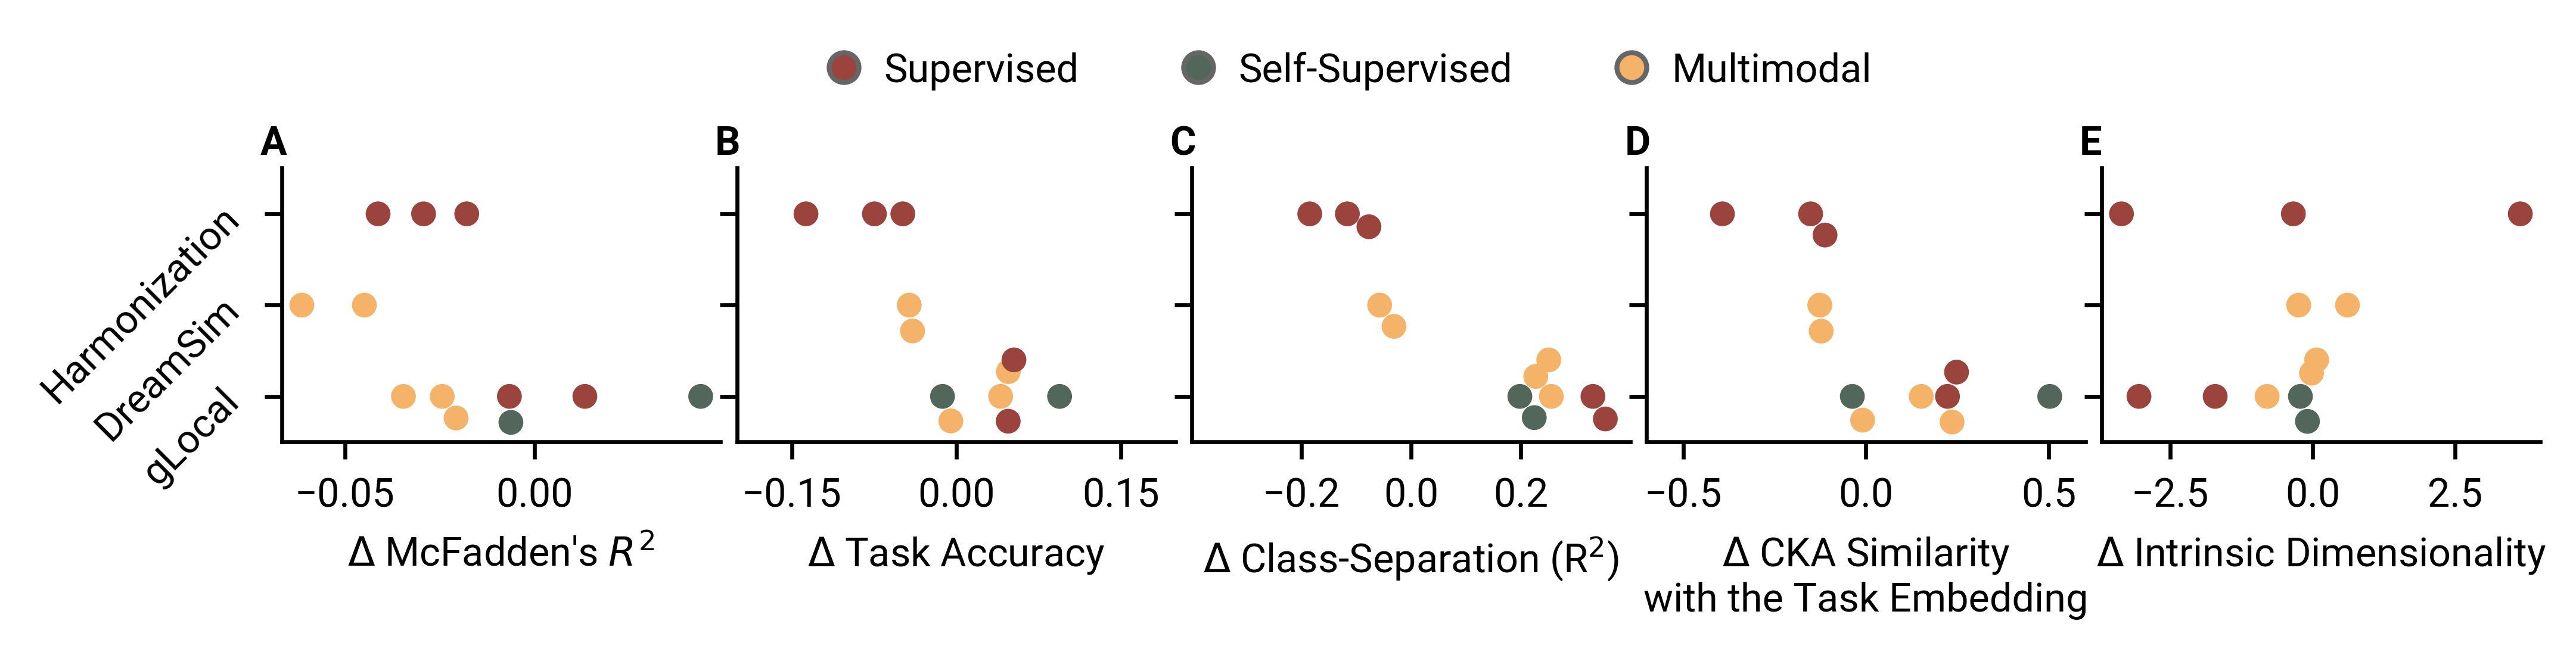

In [30]:
fig, axs = plt.subplots(1,5, figsize=(FIGWIDTH, FIGWIDTH/5),sharey=True)

sns.swarmplot(data=alignment_df,y="Alignment",x="nll",ax=axs[0],hue="colour",palette=cmap[1:4],hue_order=["Supervised", "Self-Supervised", "Multimodal"])
axs[0].legend_.remove()
axs[0].set_xlabel(r"$\Delta$ McFadden's $R^2$")
axs[0].set_ylabel("")

sns.swarmplot(data=alignment_df,y="Alignment",x="return",ax=axs[1],hue="colour",palette=cmap[1:4],hue_order=["Supervised", "Self-Supervised", "Multimodal"])
axs[1].legend_.remove()
axs[1].set_xlabel(r"$\Delta$ Task Accuracy")
axs[1].set_ylabel("")
axs[1].set_xlim([-.2,.2])
axs[1].set_xticks([-.15,0,.15])


sns.swarmplot(data=alignment_df,y="Alignment",x="r2",ax=axs[2],hue="colour",palette=cmap[1:4],hue_order=["Supervised", "Self-Supervised", "Multimodal"])
axs[2].legend_.remove()
axs[2].set_xlabel(r"$\Delta$ Class-Separation (R$^2$)")
axs[2].set_ylabel("")
axs[2].set_xlim([-.4,.4])
axs[2].set_xticks([-.2,0,.2])

sns.swarmplot(data=alignment_df,y="Alignment",x="cka",ax=axs[3],hue="colour",palette=cmap[1:4],hue_order=["Supervised", "Self-Supervised", "Multimodal"])
axs[3].legend_.remove()
axs[3].set_xlabel("$\Delta$ CKA Similarity\nwith the Task Embedding")
axs[3].set_ylabel("")
axs[3].set_xlim([-.6,.6])

sns.swarmplot(data=alignment_df,y="Alignment",x="id",ax=axs[4],hue="colour",palette=cmap[1:4],hue_order=["Supervised", "Self-Supervised", "Multimodal"])
axs[4].legend_.remove()
axs[4].set_xlabel("$\Delta$ Intrinsic Dimensionality")
axs[4].set_ylabel("")


axs[0].text(-.05, 1.05, string.ascii_uppercase[0], transform=axs[0].transAxes, weight="bold")
axs[1].text(-.05, 1.05, string.ascii_uppercase[1], transform=axs[1].transAxes, weight="bold")
axs[2].text(-.05, 1.05, string.ascii_uppercase[2], transform=axs[2].transAxes, weight="bold")
axs[3].text(-.05, 1.05, string.ascii_uppercase[3], transform=axs[3].transAxes, weight="bold")
axs[4].text(-.05, 1.05, string.ascii_uppercase[4], transform=axs[4].transAxes, weight="bold")



custom_legend_lines = [
    Line2D(
        [0],
        [0],
        color=x,
        marker="o",
        markeredgecolor=cmap[-1],
        linestyle="-",
        linewidth=0,
    )
    for x in cmap[1:4]
]
hue_order = [
    "Supervised",
    "Self-Supervised",
    "Multimodal",
]
fig.legend(
    custom_legend_lines,
    hue_order,
    loc="center",
    bbox_to_anchor=(0.52, 1.1),
    ncol=3,
    frameon=False,
    handletextpad=0.01,
)


yticklabels = alignment_df['Alignment'].drop_duplicates().tolist()

# Set the y-tick labels for the first subplot
axs[0].set_yticklabels(yticklabels,rotation=45)


plt.tight_layout(pad=-.03)



with mpl.rc_context(latex_context):
    fig.savefig(join(project_root, "figures","neurips_alignment.pdf"), bbox_inches='tight')

## Supplementary Figures

### p Values For Trials

In [162]:
sub_df = merged_df[merged_df.features == "Harmonization-EfficientNetB0"][["return", "training_data", "r2", "cka", "id"]]

# round return, r2, cka, id to two decimals
sub_df = sub_df.round({"return": 2, "r2": 2, "cka": 2, "id": 2})

# divide training data by one million and convert it to int
sub_df = sub_df.fillna(0)
sub_df.training_data = np.where(sub_df.training_data == "NA",0, sub_df.training_data)
sub_df['training_data'] = (sub_df['training_data'].astype(int) / 1000000).astype(float)

sub_df = sub_df.style.format(precision=2)
print(sub_df.to_latex())

\begin{tabular}{lrrrrr}
 & return & training_data & r2 & cka & id \\
72 & 0.51 & 1.28 & 0.08 & 0.00 & 10.54 \\
\end{tabular}



In [100]:
sub_df

array([0], dtype=object)

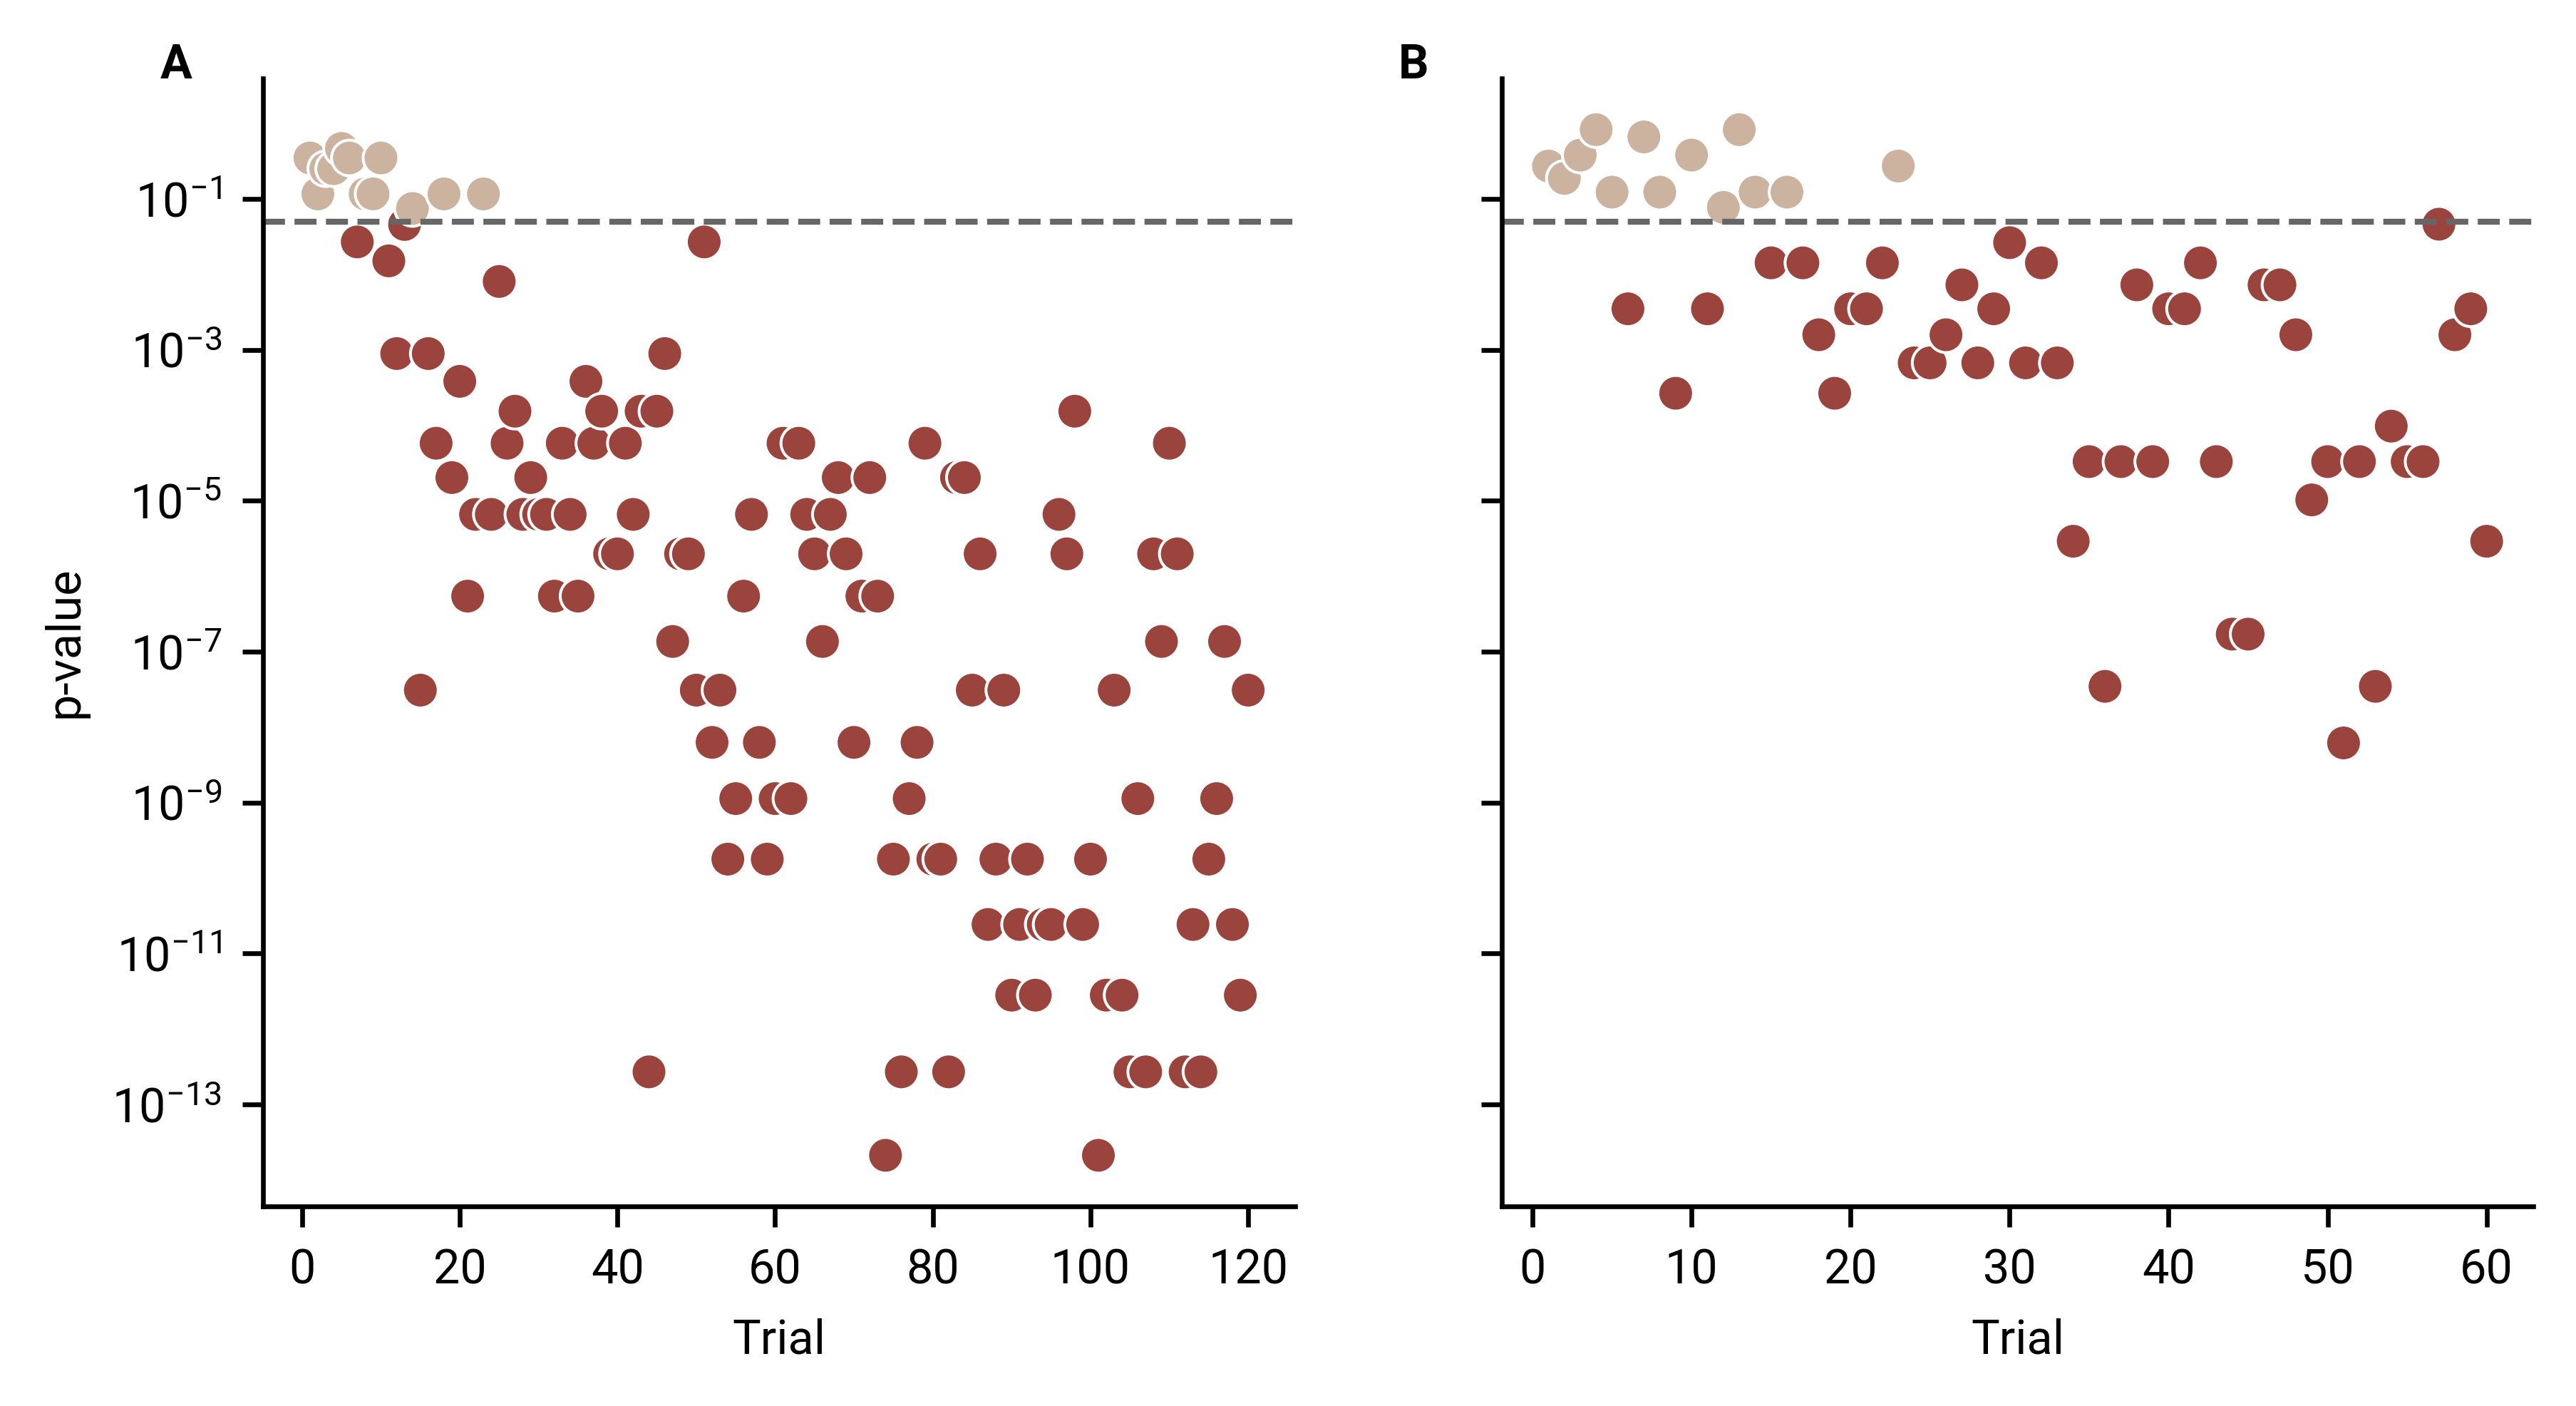

In [32]:
SINGLECOLWIDTH = 3.4252
fig, ax = plt.subplots(1, 2, figsize=(2 * SINGLECOLWIDTH, SINGLECOLWIDTH), sharey=True)
behavioural_df = pd.read_csv(
    join(
        project_root,
        "data",
        "human_behavioural",
        "category_learning",
        "above_chance.csv",
    )
)

# loop through each trial in the behavioural df, and do a t-test against .5
# record p-values
p_values = []
for trial in behavioural_df.trial.unique():
    p_values.append(
        ttest_1samp(behavioural_df[behavioural_df.trial == trial].correct, 0.5)[1]
    )

category_p_df = pd.DataFrame(
    {"trial": np.array(behavioural_df.trial.unique()) + 1, "p": p_values}
)
category_p_df["sig"] = np.where(category_p_df.p < 0.05, 1, 0)

sns.scatterplot(
    data=category_p_df, x="trial", y="p", hue="sig", ax=ax[0], color=cmap[-2]
)
# log scale for y axis
ax[0].set_yscale("log")
ax[0].set_xlabel("Trial")
ax[0].set_ylabel("p-value")
# dashed grey horizontal line at .05
ax[0].axhline(0.05, ls="--", color=cmap[-1], lw=1)
# remove legend
ax[0].legend_.remove()

# do the same for reward learning
behavioural_df = pd.read_csv(
    join(
        project_root, "data", "human_behavioural", "reward_learning", "above_chance.csv"
    )
)
p_values = []
for trial in behavioural_df.trial.unique():
    p_values.append(
        ttest_1samp(behavioural_df[behavioural_df.trial == trial].correct, 0.5)[1]
    )

reward_p_df = pd.DataFrame(
    {"trial": np.array(behavioural_df.trial.unique()) + 1, "p": p_values}
)
reward_p_df["sig"] = np.where(reward_p_df.p < 0.05, 1, 0)

sns.scatterplot(data=reward_p_df, x="trial", y="p", hue="sig", ax=ax[1], color=cmap[-2])
# log scale for y axis
# match it to the category learning plot
ax[1].set_yscale("log")


ax[1].set_xlabel("Trial")
ax[1].set_ylabel("p-value")
# dashed grey horizontal line at .05
ax[1].axhline(0.05, ls="--", color=cmap[-1], lw=1)
# remove legend
ax[1].legend_.remove()

ax[0].text(
    -0.1, 1.0, string.ascii_uppercase[0], transform=ax[0].transAxes, weight="bold"
)
ax[1].text(
    -0.1, 1.0, string.ascii_uppercase[1], transform=ax[1].transAxes, weight="bold"
)
plt.show()


with mpl.rc_context(latex_context):
    fig.savefig(join(project_root, "figures", "p_values.pdf"), bbox_inches="tight")

In [33]:
merged_df = merged_df[merged_df.color.isin(["multimodal", "self-supervised", "supervised"])]
model_types = []
test_types = []
correlation_values = []
p_values = []


for test in ["model_size", "training_data", "r2", "cka", "id"]:
    for model_type in merged_df.color.unique():
        sub_df = merged_df[merged_df.color == model_type]

        corr = spearmanr(sub_df[test], sub_df.nll)

        print(f"{test} to nll correlation for {model_type}: {corr[0]} with p-value {corr[1]}")

        model_types.append(model_type)
        test_types.append(test)
        correlation_values.append(corr[0])
        p_values.append(corr[1])

model_size to nll correlation for multimodal: 0.018992174848730198 with p-value 0.9348767481049214
model_size to nll correlation for supervised: -0.15994353862835434 with p-value 0.39007295579149825
model_size to nll correlation for self-supervised: -0.1954761975971038 with p-value 0.43695778189201395
training_data to nll correlation for multimodal: 0.18710356389008276 with p-value 0.4167208112265749
training_data to nll correlation for supervised: -0.22020758231801382 with p-value 0.23390493126535697
training_data to nll correlation for self-supervised: -0.20666688882952602 with p-value 0.4106189481512458
r2 to nll correlation for multimodal: 0.5558441558441559 with p-value 0.008888714088043446
r2 to nll correlation for supervised: 0.7588709677419356 with p-value 7.508273355480878e-07
r2 to nll correlation for self-supervised: -0.29132231404958686 with p-value 0.24083492322780575
cka to nll correlation for multimodal: 0.7 with p-value 0.00041129387136387544
cka to nll correlation for 

In [34]:
new_plot_df = pd.DataFrame(
    {
        "model_type" : model_types,
        "test_type" : test_types,
        "correlations" : correlation_values,
        "p_values" : p_values
    }
)

In [45]:
new_plot_df

model_type      test_type  correlations      p_values
0        multimodal     model_size      0.018992  9.348767e-01
1        supervised     model_size     -0.159944  3.900730e-01
2   self-supervised     model_size     -0.195476  4.369578e-01
3        multimodal  training_data      0.187104  4.167208e-01
4        supervised  training_data     -0.220208  2.339049e-01
5   self-supervised  training_data     -0.206667  4.106189e-01
6        multimodal             r2      0.555844  8.888714e-03
7        supervised             r2      0.758871  7.508273e-07
8   self-supervised             r2     -0.291322  2.408349e-01
9        multimodal            cka      0.700000  4.112939e-04
10       supervised            cka      0.594355  4.224220e-04
11  self-supervised            cka      0.404959  9.550298e-02
12       multimodal             id     -0.684416  6.212722e-04
13       supervised             id     -0.254435  1.671938e-01
14  self-supervised             id      0.361570  1.403999e-01

/var/folders/2t/zlktsbp913sc2d_5zx40s3rh0000gn/T/ipykernel_90261/3292245261.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Model\nSize", "Training Data\nSize", "Intrinsic\nDimensionality"])
/var/folders/2t/zlktsbp913sc2d_5zx40s3rh0000gn/T/ipykernel_90261/3292245261.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),)


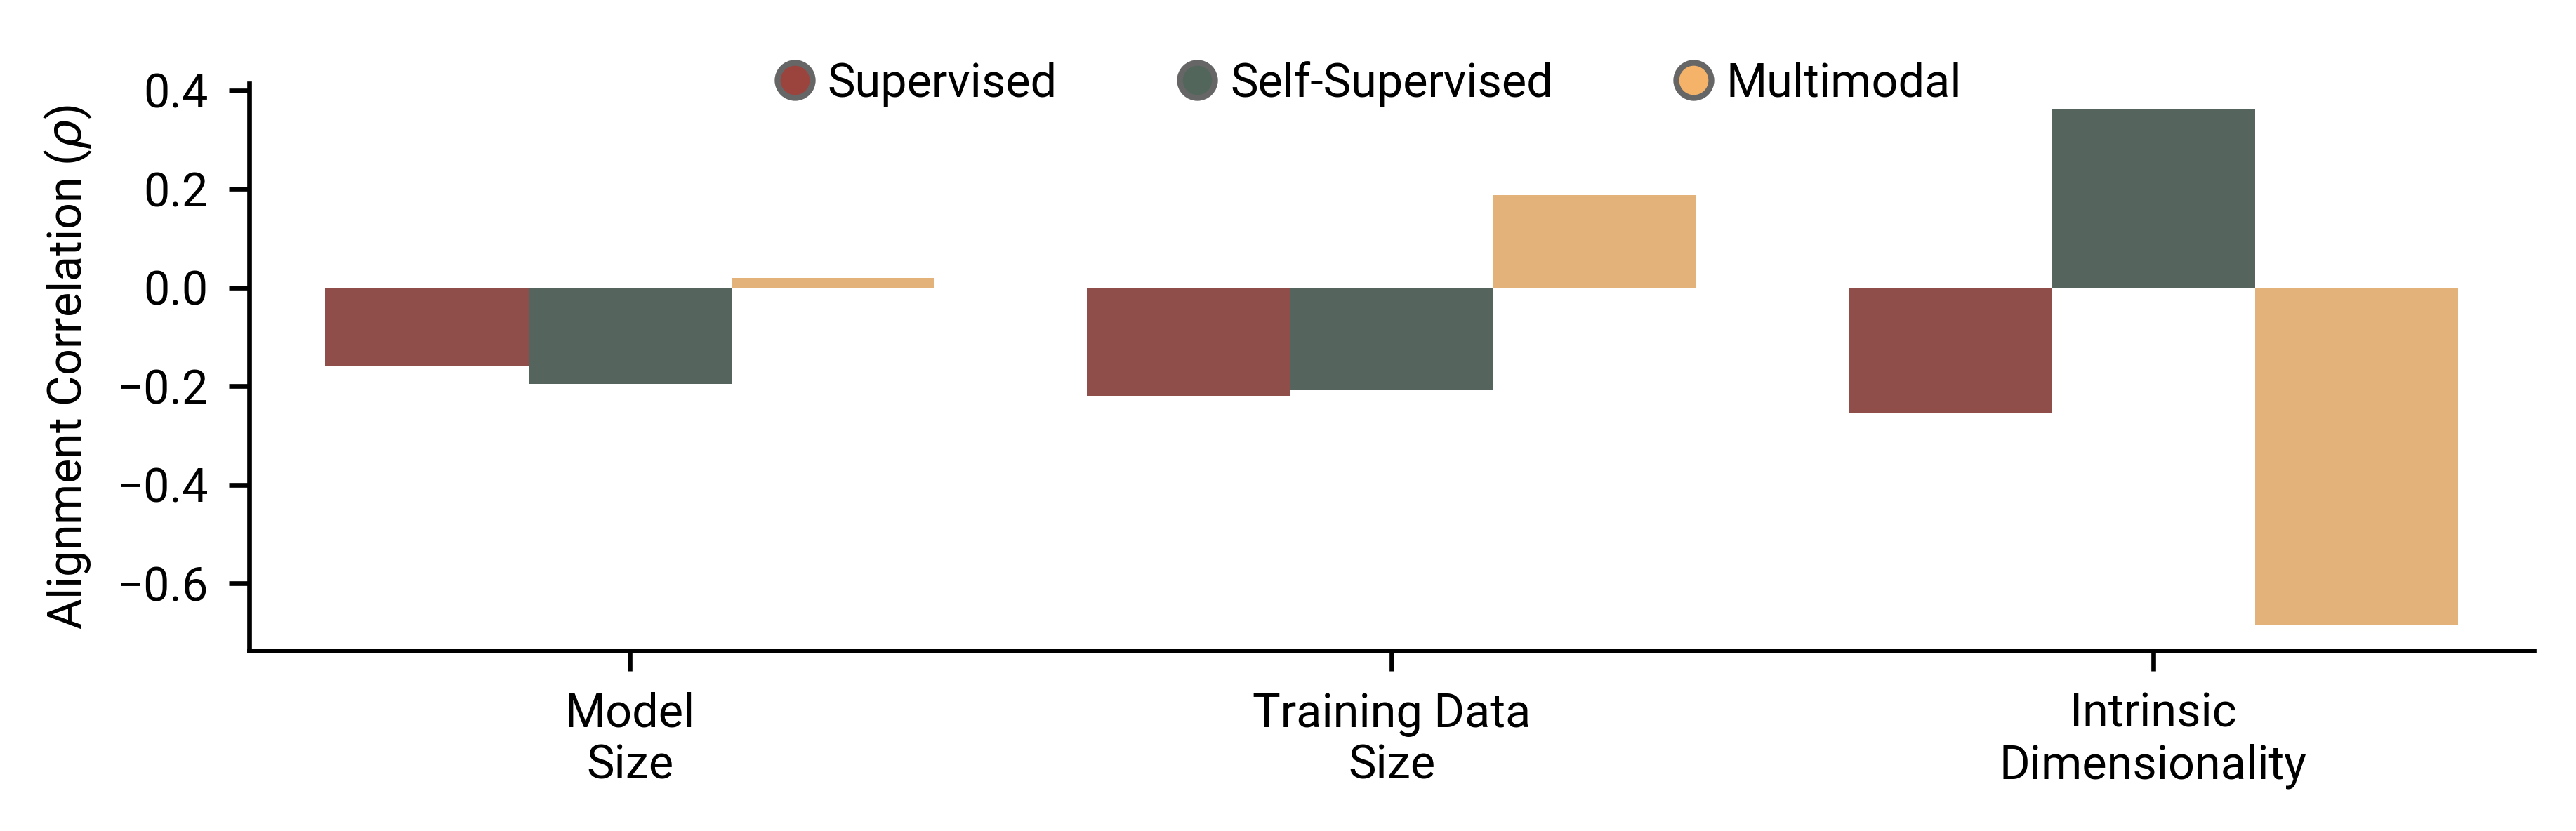

<Figure size 1920x1440 with 0 Axes>

In [64]:
fig,ax = plt.subplots(figsize=(FIGWIDTH,FIGWIDTH/4))

new_plot_df = new_plot_df[new_plot_df.test_type.isin(["model_size","training_data","id"])]
sns.barplot(data=new_plot_df, y="correlations", x="test_type", hue="model_type", ax=ax, hue_order=["supervised",'self-supervised','multimodal'],palette=[cmap[1],cmap[2],cmap[3]])

# Update y-axis label and x-axis tick labels to match the new orientation
ax.set_ylabel(r"Alignment Correlation ($\rho$)",)
ax.set_xticklabels(["Model\nSize", "Training Data\nSize", "Intrinsic\nDimensionality"])
ax.set_xlabel("")
ax.set_xticklabels(ax.get_xticklabels(),)
ax.legend_.remove()


custom_legend_lines = [
    Line2D(
        [0],
        [0],
        color=x,
        marker="o",
        markeredgecolor=cmap[-1],
        linestyle="-",
        linewidth=0,
    )
    for x in [cmap[1],cmap[2],cmap[3]]
]
hue_order = [
    "Supervised",
    "Self-Supervised",
    "Multimodal",
]


fig.legend(
    custom_legend_lines,
    hue_order,
    loc="center",
    bbox_to_anchor=(.5, .88),
    ncol=3,
    frameon=False,
    handletextpad=-.3,
)

# Show the plot
plt.show()
plt.tight_layout()

with mpl.rc_context(latex_context):
    fig.savefig(join(project_root, "figures", "factor_by_type.pdf"), bbox_inches="tight")

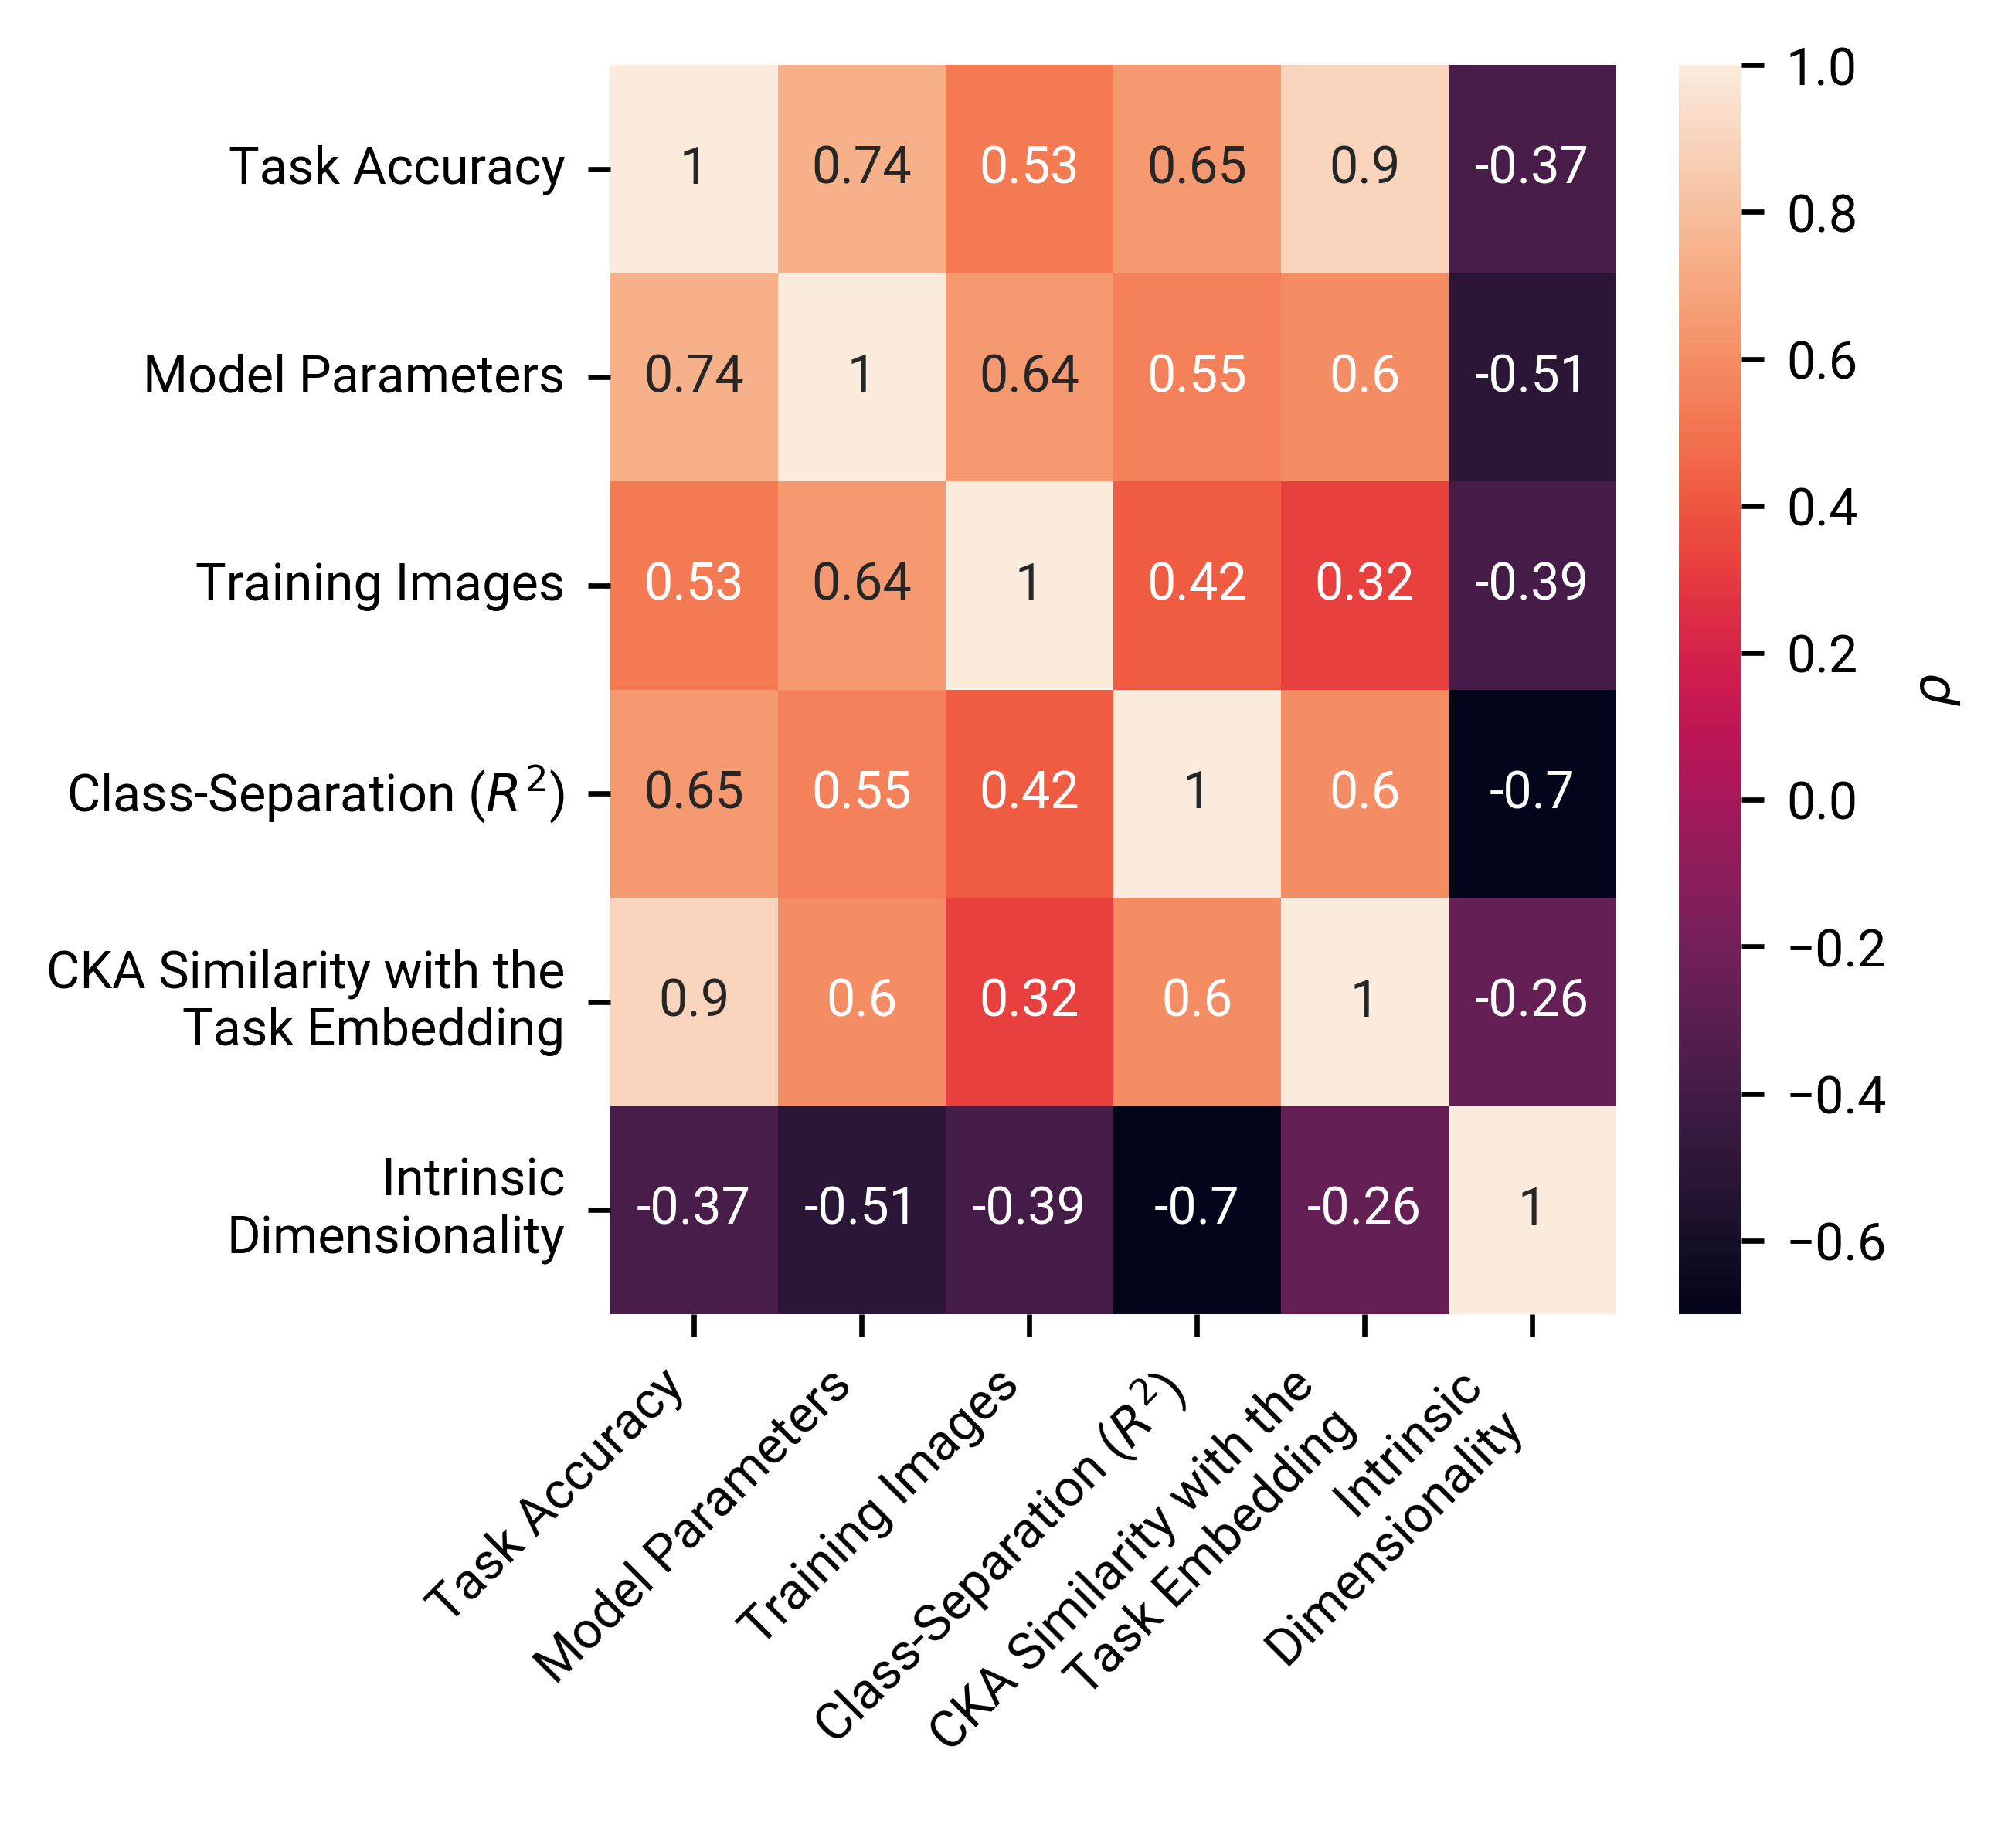

In [38]:
fig,ax = plt.subplots(figsize=(FIGWIDTH/2,FIGWIDTH/2))


corr_df = merged_df[["return","training_data","model_size","r2","cka","id"]].corr(method="spearman")
sns.heatmap(corr_df,annot=True,ax=ax)
ax.set_yticklabels(["Task Accuracy", "Model Parameters", "Training Images", r"Class-Separation ($R^2$)", "CKA Similarity with the\nTask Embedding","Intrinsic\nDimensionality"])

ax.set_xticklabels([
    "Task Accuracy",
    "Model Parameters",
    "Training Images",
    r"Class-Separation ($R^2$)",
    "CKA Similarity with the\nTask Embedding",
    "Intrinsic\nDimensionality"
], rotation=45, ha='right')

# Add a label to the colorbar
cbar = ax.collections[0].colorbar
cbar.set_label(r"$\rho$")


with mpl.rc_context(latex_context):
    fig.savefig(join(project_root, "figures", "pairwise_correlations.pdf"), bbox_inches="tight")